<a href="https://colab.research.google.com/github/russopaulo/Censo_Ilheus_AI_immersion/blob/main/Ilheus_Censo_2022(2024_study).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Brazil - CENSO 2022 - IBGE**

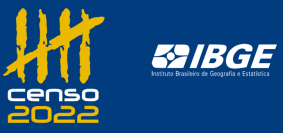


### **Ilhéus - Bahia**
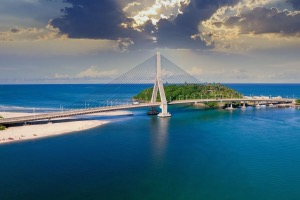


* *The purpose of this study is to analyze the data available in tha Brazilian Censo 2022 published by IBGE (The Brazilian Institute of Geography and Statistics);*

* *Censo is the main population census of Brazil;*

* *IBGE is the main provider of data and information about the Country;*

* *This analysis is focused in the Brazilian city of Ilhéus, state of Bahia.*


**Data source:**

*https://sidra.ibge.gov.br/pesquisa/censo-demografico/demografico-2022/inicial*


*For this study, the data was filtered from Bigquery to focus only in the city of Ilhéus:*

*https://console.cloud.google.com/bigquery?p=basedosdados&d=br_ibge_censo_2022*



In [1]:
#Required libraries

import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import google.generativeai as genai
import PIL.Image

# Importing Google AI model and API
from google.colab import userdata
api_key = userdata.get('SECRET_KEY')
genai.configure(api_key=api_key)
generation_config = {
  "temperature": 1,
  #"top_p": 0.95, # in case you need to setup
  #"top_k": 0, # in case you need to setup
  #"max_output_tokens": 8192, # in case you need to setup
}
#safety_settings = [ # in case you need to setup
#  {
#    "category": "HARM_CATEGORY_HARASSMENT",
#    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
#  },
#  {
#    "category": "HARM_CATEGORY_HATE_SPEECH",
#    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
#  },
#  {
#    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
#    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
#  },
#  {
#    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
#    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
#  },
#]
model = genai.GenerativeModel(model_name="gemini-1.5-pro-latest",
                              generation_config=generation_config,)
                              #safety_settings=safety_settings)

#Clone public Github repository to access files
!git clone https://github.com/russopaulo/Censo_Ilheus_AI_immersion.git

#Path to where files were downloaded after filtered from Bigquery
#Files are available on public Github folder https://github.com/russopaulo/Censo_Ilheus_AI_immersion
os.chdir('/content/Censo_Ilheus_AI_immersion')

# Check if you are in the right directory
os.getcwd()


Cloning into 'Censo_Ilheus_AI_immersion'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 89 (delta 34), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (89/89), 11.14 MiB | 3.94 MiB/s, done.
Resolving deltas: 100% (34/34), done.


'/content/Censo_Ilheus_AI_immersion'

Import all datasets from Bigquery filtered

In [ ]:
#df_pop_res_mun[df_pop_res_mun['sexo'] == 'Homens']['populacao_residente'].sum()
#df_pop_res_mun[df_pop_res_mun['sexo'] == 'Mulheres']['populacao_residente'].sum()

In [2]:
#Geo Cordinates table
df_coord = pd.read_csv('coordenada_endereco.csv')

#Demographic density table
df_area_terr_dens_dem_mun = pd.read_csv('area_territorial_densidade_demografica_municipio.csv')

#Indexes tables
df_indice_env_mun = pd.read_csv('indice_envelhecimento_municipio.csv')
df_indice_env_cor_raca_mun = pd.read_csv('indice_envelhecimento_cor_raca_municipio.csv')

#Population tables
df_pop_res_mun = pd.read_csv('populacao_residente_municipio.csv')
df_pop_res_cor_raca = pd.read_csv('populacao_residente_cor_raca_municipio.csv')






#Quilombo tables
df_quil_pop_res_mun = pd.read_csv('quilombolas_populacao_residente_municipio.csv')




#Residents tables
df_mor_cor_raca_tip_dom_mun = pd.read_csv('morador_cor_raca_tipo_domicilio_municipio.csv')
df_mor_cor_raca_lig_abast_agua_mun = pd.read_csv('morador_cor_raca_ligacao_abastecimento_agua_municipio.csv')
df_mor_cor_raca_esgot_san_mun = pd.read_csv('morador_cor_raca_esgotamento_sanitario_municipio.csv')
df_mor_cor_raca_dest_lix_mun = pd.read_csv('morador_cor_raca_destino_lixo_municipio.csv')

#Indigenous tables
df_indig_pop_res_mun = pd.read_csv('indigenas_populacao_residente_municipio.csv')
df_indig_pop_grup_idad_mun = pd.read_csv('indigenas_populacao_grupo_idade_municipio.csv')
df_indig_indic_env_mun = pd.read_csv('indigenas_indice_envelhecimento_municipio.csv')
df_indig_dom_1_mor_ind_mun = pd.read_csv('indigenas_domicilio_pelo_menos_um_morador_indigena_municipio.csv')
df_indig_dom_mor_mun = pd.read_csv('indigenas_domicilio_morador_municipio.csv')



#Domiciles tables
df_dom_tipo_mun = pd.read_csv('domicilio_tipo_municipio.csv')
df_dom_qtde_esgot_san_mun = pd.read_csv('domicilio_quantidade_esgotamento_sanitario_municipio.csv')
df_dom_mor_setor_censit = pd.read_csv('domicilio_morador_setor_censitario.csv')
df_dom_mor_mun = pd.read_csv('domicilio_morador_municipio.csv')
df_dom_lig_abast_agua_mun = pd.read_csv('domicilio_ligacao_abastecimento_agua_municipio.csv')
df_dom_esgot_san_mun = pd.read_csv('domicilio_esgotamento_sanitario_municipio.csv')
df_dom_dest_lix_mun = pd.read_csv('domicilio_destino_lixo_municipio.csv')
df_dom_canal_abast_agua_mun = pd.read_csv('domicilio_canalizacao_abastecimento_agua_municipio.csv')




Convert and check address type quantity

In [3]:
#Reference for especie_endereco column

#1 Domicílio particular
#2 Domicílio coletivo
#3 Estabelecimento agropecuário
#4 Estabelecimento de ensino
#5 Estabelecimento de saúde
#6 Estabelecimento de outras finalidades
#7 Edificação em construção
#8 Estabelecimento religioso

#Convert numbers to words
df_coord['especie_endereco'].replace([1, 2, 3, 4, 5, 6, 7, 8], ['Particular Dom.', 'Colective Dom.', 'Agricult. Estab.', 'Teaching Estab.', 'Health Estab.', 'Other Estab.', 'Build. u/Construct.', 'Religious Estab.'], inplace=True)

#Save on a variable to plot
address_type = df_coord['especie_endereco'].value_counts(ascending=True)


Plot address type to check

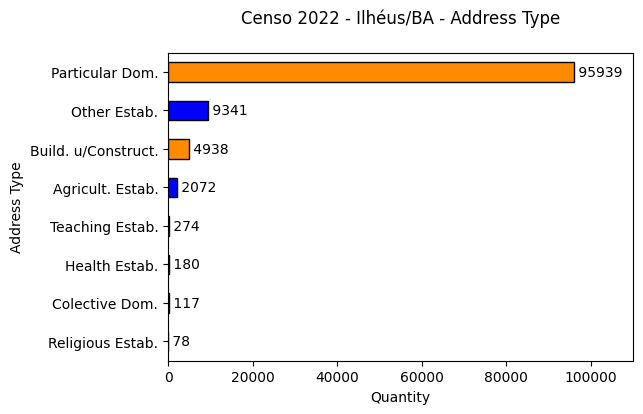

In [4]:
address_type_plot = address_type.plot(kind='barh',
                  title='Censo 2022 - Ilhéus/BA - Address Type\n',
                  ylabel='Address Type',
                  xlabel='Quantity',
                 color=['blue', 'darkorange'],
                  edgecolor='black',
                  figsize=(6,4),
                  xlim=(0, 110000),
                  )


for index, value in enumerate(address_type.values):
    plt.text(value, index, (' ' +
             str(value)), va='center')


Above we can see most part of establishments in Ilhéus are Particular (+95k), followed by Other (+9k) and under construction (+4k).

Below we have same numbers but showing in % scale.

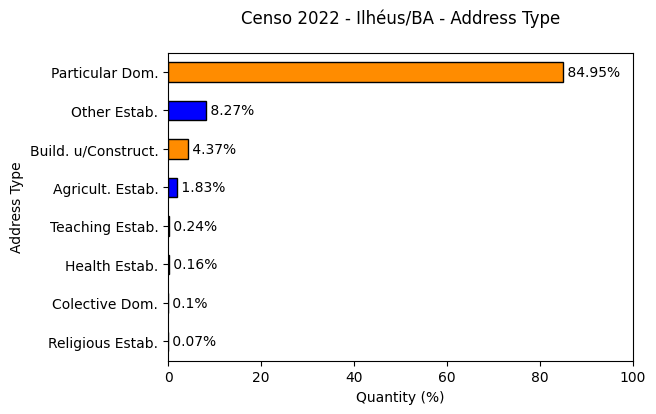

In [5]:
address_type_perc = round(df_coord['especie_endereco'].value_counts(ascending=True, normalize=True) * 100, 2)

address_type_perc_plot = address_type_perc.plot(kind='barh',
                  title='Censo 2022 - Ilhéus/BA - Address Type\n',
                  ylabel='Address Type',
                  xlabel='Quantity (%)',
                 color=['blue', 'darkorange'],
                  edgecolor='black',
                  figsize=(6,4),
                  xlim=(0, 100),
                  )


for index, value in enumerate(address_type_perc.values):
    plt.text(value, index, (' ' +
             str(value) + '%'), va='center')

#Convert the plot into an image
plt.savefig('address_type_perc_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
#Open the saved plot image on environment and save in a variable
address_type_perc_plot_image = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/address_type_perc_plot.png')

#Pass the plot into Gemini to get more accurates insights
response = model.generate_content(('Get insights from this dataset about Ilhéus population', address_type_perc_plot_image))
print(response.text)

This dataset presents the distribution of different address types in Ilhéus, Bahia, Brazil, according to the 2022 census. 

**Key Insights:**

* **Predominance of Residential Addresses:** An overwhelming majority (84.95%) of addresses in Ilhéus are classified as "Particular Dom." (meaning "Particular Residence"), signifying a largely residential character of the city. 
* **Limited Presence of Non-Residential Establishments:** Other address types constitute a significantly smaller portion:
    * "Other Estab." (likely referring to commercial and service establishments) represent 8.27%.
    * "Build. u/Construct." (buildings under construction) account for 4.37%.
* **Negligible Representation of Specific Sectors:** Addresses classified as "Agricult. Estab." (agricultural establishments), "Teaching Estab." (educational institutions), "Health Estab." (healthcare facilities), "Colective Dom." (collective residences), and "Religious Estab." (religious institutions) make up a very small perce

In [7]:
#Checking how many addresses were visited by the agents
df_coord.shape

(112939, 7)

Plotting points where Censo agents visited by Address Type (112939 points).

Censo 2022 visited + 112k places in Ilhéus.

Plotting an interactive map to see all these points visible, colored by address type.

In [8]:
fig = px.scatter_mapbox(df_coord, lat='latitude', lon='longitude', color='especie_endereco',
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                  mapbox_style='carto-positron',
                  title='Addresses Visited - Censo 2022 - Ilhéus/BA',
                  labels={'especie_endereco': 'Address Type'})

#Save the map as html so it can be accessed from Github or on slide presentation

fig.write_html("Ilheus_2022_censo_interactive_map.html")
fig.show()

Map can be accessed on link https://sites.google.com/view/address-visit-censo2022-ios-ba/home

Some points on the map may not be 100% accurate, this is because the level (or type) of the geo coordinate.

In [9]:
#1 Endereço - coordenada original do Censo 2022
#2 Endereço - coordenada modificada (apartamentos em um mesmo número no logradouro)
#3 Endereço - coordenada estimada (endereços originalmente sem coordenadas ou coordenadas inválidas)
#4 Face de quadra
#5 Localidade
#6 Setor censitário

df_coord['nivel_geo_coordenada'].value_counts()
df_coord['nivel_geo_coordenada'].replace([1, 2, 3, 4, 5, 6], ['Address - original 2022 Census coordinate', 'Address - modified coordinate (apartments with the same number in the street)', 'Address - estimated coordinate (addresses originally without coordinates or invalid coordinates)', 'Square face', 'Location', 'Census Sector'], inplace=True)

coord_level = df_coord['nivel_geo_coordenada'].value_counts(ascending=True)


Plotting the geo coordinate level.

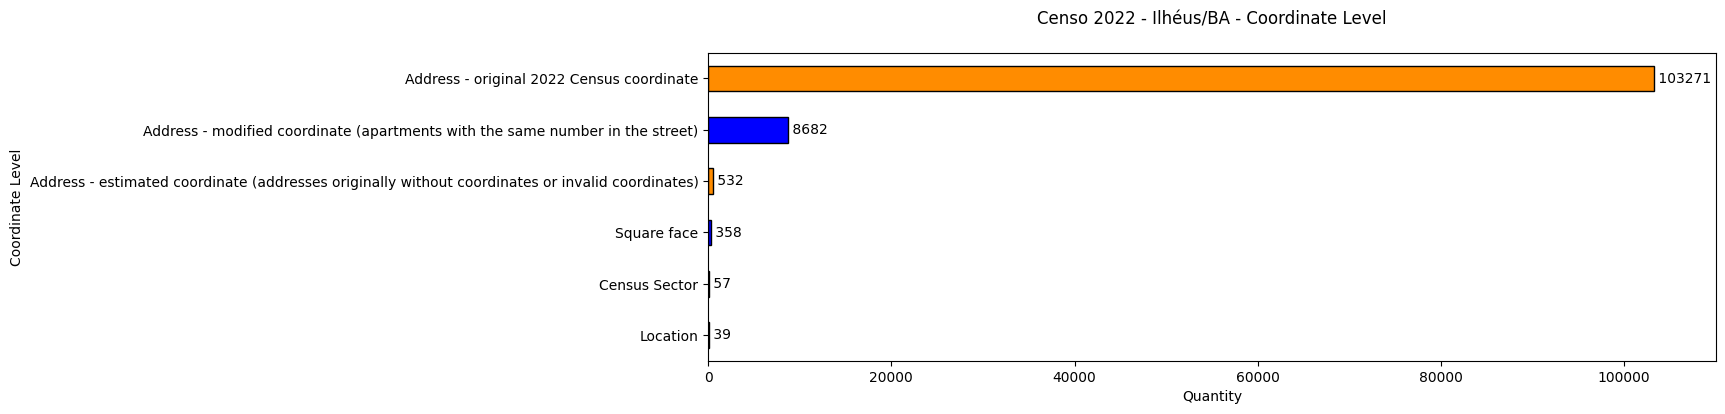

In [10]:
coord_level = df_coord['nivel_geo_coordenada'].value_counts(ascending=True)

coord_level.plot(kind='barh',
                  title='Censo 2022 - Ilhéus/BA - Coordinate Level\n',
                  ylabel='Coordinate Level',
                  xlabel='Quantity',
                 color=['blue', 'darkorange'],
                  edgecolor='black',
                  figsize=(13,4),
                  xlim=(0, 110000),
                  )

for index, value in enumerate(coord_level.values):
    plt.text(value, index, (' ' +
             str(value)), va='center')

Plotting again but with a % scale

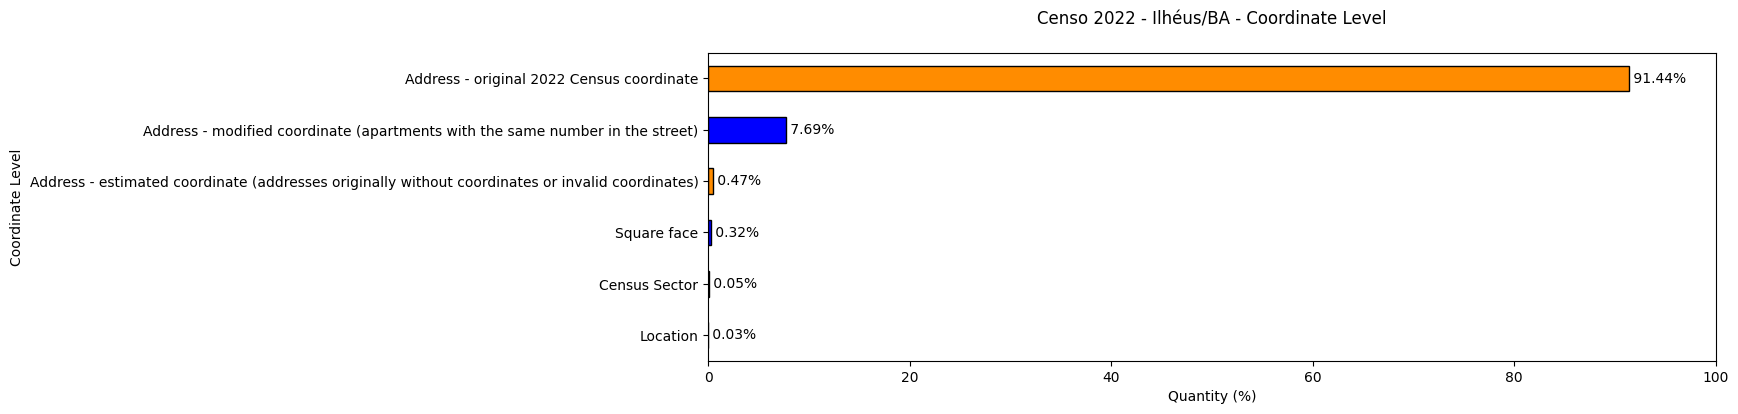

In [11]:
coord_level = round(df_coord['nivel_geo_coordenada'].value_counts(ascending=True, normalize=True) * 100, 2)

coord_level.plot(kind='barh',
                  title='Censo 2022 - Ilhéus/BA - Coordinate Level\n',
                  ylabel='Coordinate Level',
                  xlabel='Quantity (%)',
                 color=['blue', 'darkorange'],
                  edgecolor='black',
                  figsize=(13,4),
                  xlim=(0, 100),
                  )

for index, value in enumerate(coord_level.values):
    plt.text(value, index, (' ' +
             str(value) + '%'), va='center')

#Convert the plot into an image
plt.savefig('coord_level_plot.png', dpi=300, bbox_inches='tight')
plt.show()

About 103k addresses (91%) coordinates were originally collected on 2022, while about 8k are modified coordinates (apartments with the same number in the street). The remaining are unexpressible, less than 1000 addresses (less than 1%). We can conclude the addresses in general express the reality very well.

In [12]:
#Open the saved plot image on environment and save in a variable
coord_level_plot_image = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/coord_level_plot.png')

#Pass the plot into Gemini to get more accurates insights
response = model.generate_content(('Get insights from this dataset about Ilhéus population', coord_level_plot_image))
print(response.text)

The overwhelming majority (91.44%) of the Ilhéus population in the 2022 Census dataset have coordinates directly derived from their original addresses. This suggests a high level of accuracy in address data collection during the census. 

However, a noticeable portion (7.69%) had their coordinates modified for apartments sharing the same street number. This highlights the challenge of precisely geolocating residences within multi-unit buildings and the importance of post-census adjustments for accuracy.

The remaining categories, representing less than 1% combined, show that very few locations relied on estimations, square face positioning, Census Sector information, or general location data. This reinforces the conclusion that Ilhéus possesses relatively reliable and granular address data for its population. 



Now let's check how concentrated is the Ilhéus population and the total population.

In [13]:
popul_dens = df_area_terr_dens_dem_mun[df_area_terr_dens_dem_mun['id_municipio'] == 2913606]

popul_dens = popul_dens['populacao_residente'] / popul_dens['area_unidade_territorial']

popul_res = df_area_terr_dens_dem_mun[df_area_terr_dens_dem_mun['id_municipio'] == 2913606]

print(popul_dens)
print(popul_res['populacao_residente'])



1030    112.428571
dtype: float64
1030    178649
Name: populacao_residente, dtype: int64


Ilhéus has a demographic density of about 112 persons per square meter, pretty low, as a reference São Paulo (biggest city in Brazil) has 7382, Salvador 3486.

Ilhéus has about 178k residents in 2022, as a reference São Paulo has 11.9MI and Salvador 2.4MI.

In 2010 Ilhéus had 184k residents. We see a population decrease of 6k.

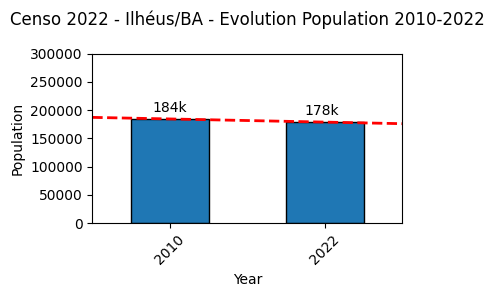

In [14]:
# The total population from 2010 was extraced from the Censo 2010 link below
# https://www.ibge.gov.br/apps/snig/v1/?loc=0,291360&cat=-1,-2,-3,128&ind=4707

d = {'Year': [2010, 2022], 'Population': [184236, 178649]}
pop_2010_2022 = pd.DataFrame(data=d)

pop_2010_2022.plot(kind='bar',
                                             x='Year',
                                             y='Population',
                                             edgecolor='black',
                                             ylabel='Population',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 300000),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution Population 2010-2022\n',
                                             rot=45
                                            )

plt.axline((0, 184236), (1, 178649), linewidth=2, color='r', linestyle='--')
plt.text(-0.11, 197236, '184k')
plt.text(0.87, 190649, '178k')
plt.show()

Let's check general distribution of median age, age index and sex ratio.

In [15]:
df_indice_env_mun = df_indice_env_mun[['idade_mediana', 'indice_envelhecimento', 'razao_sexo']]
df_indice_env_mun

idade_mediana  indice_envelhecimento  razao_sexo
0           36.0                  56.87       91.87

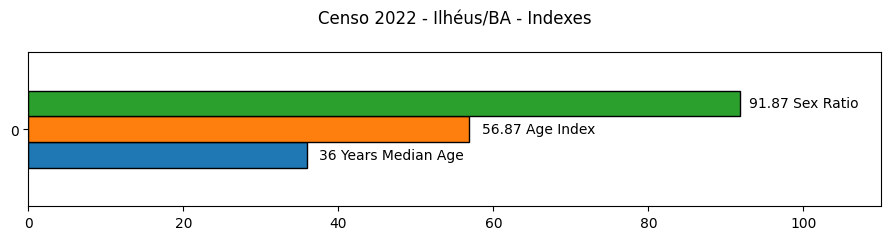

In [16]:
df_indice_env_mun.plot(kind='barh',
                        title='Censo 2022 - Ilhéus/BA - Indexes\n',
                        legend=False,
                        edgecolor='black',
                        figsize=(11,2),
                        xlim=(0, 110),
                       )

plt.text(37.5, -0.17, '36 Years Median Age ', va='center')
plt.text(58.5, 0, '56.87 Age Index', va='center')
plt.text(93, 0.17, '91.87 Sex Ratio', va='center')


plt.savefig('df_indice_env_mun_plot.png', dpi=300, bbox_inches='tight')
plt.show()


Ilhéus has an aging index of 56.87 in 2022, which means for every 56 elderly (+60 years) there are 100 children (-15 years).

Age index considers:
- a value lower than 15 as indicative of a young population;
- between 15 and 30, a population at an intermediate level;
- and over 30, an elderly population.

In this case we can consider that Ilhéus has an elderly population, besides the median age is 36.

Another interest indicator is sex ratio 91.87, which means that for every 91 men there are 100 women, an indication that the majority of population in Ilhéus is female.

In [17]:
#Open the saved plot image on environment and save in a variable
df_indice_env_mun_plot = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/df_indice_env_mun_plot.png')

#Pass the plot into Gemini to get more accurates insights
response = model.generate_content(('Get insights from this dataset about Ilhéus population', df_indice_env_mun_plot))
print(response.text)

Based on the provided data from "Censo 2022 - Ilhéus/BA - Indexes", here are some insights about the population of Ilhéus, Bahia:

* **Relatively Young Population:** The Age Index is 56.87. This index represents the number of people aged 65 and over for every 100 people under 15. A value below 100 generally indicates a younger population. Therefore, Ilhéus likely has a larger proportion of younger people compared to older adults.

* **Median Age:** The Median Age of 36 years reinforces the idea of a younger population. This means that half of the population in Ilhéus is younger than 36, and the other half is older.

* **More Females than Males:** A Sex Ratio of 91.87 indicates that there are approximately 91.87 males for every 100 females in Ilhéus. This suggests a slightly higher proportion of females in the population. 

**Possible Implications and Further Research:**

* **Healthcare and Education:** The younger population suggests a potential need for greater focus on education and 

But Ilhéus 10 years ago was not like that, let's check the evolution of aging index, median age and sex ratio on last 12 years by race.

In [18]:
#df_indice_env_cor_raca_mun.drop('id_municipio', axis=1, inplace=True)

parda = df_indice_env_cor_raca_mun[df_indice_env_cor_raca_mun['cor_raca'] == 'Parda']
preta = df_indice_env_cor_raca_mun[df_indice_env_cor_raca_mun['cor_raca'] == 'Preta']
branca = df_indice_env_cor_raca_mun[df_indice_env_cor_raca_mun['cor_raca'] == 'Branca']
amarela = df_indice_env_cor_raca_mun[df_indice_env_cor_raca_mun['cor_raca'] == 'Amarela']
indigena = df_indice_env_cor_raca_mun[df_indice_env_cor_raca_mun['cor_raca'] == 'Indígena']

parda, preta, branca, amarela, indigena

(    ano  id_municipio cor_raca  indice_envelhecimento  idade_mediana  \
 0  2010       2913606    Parda                  36.23             27   
 1  2022       2913606    Parda                  79.63             36   
 
    razao_sexo  
 0       93.53  
 1       90.73  ,
     ano  id_municipio cor_raca  indice_envelhecimento  idade_mediana  \
 2  2010       2913606    Preta                  47.72             29   
 3  2022       2913606    Preta                  95.33             36   
 
    razao_sexo  
 2      102.98  
 3       97.23  ,
     ano  id_municipio cor_raca  indice_envelhecimento  idade_mediana  \
 4  2010       2913606   Branca                  52.44             30   
 5  2022       2913606   Branca                 102.50             37   
 
    razao_sexo  
 4       89.52  
 5       87.98  ,
     ano  id_municipio cor_raca  indice_envelhecimento  idade_mediana  \
 6  2010       2913606  Amarela                  24.88             26   
 7  2022       2913606  Amarela    

Plotting all cases

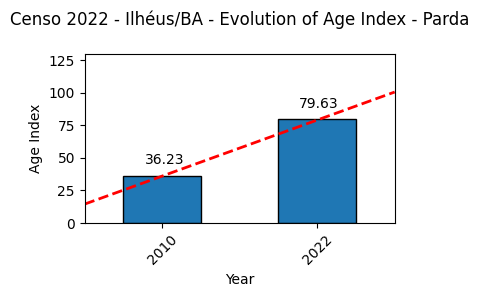

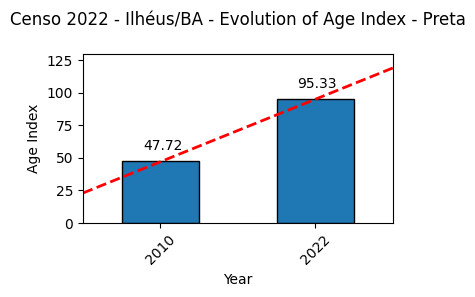

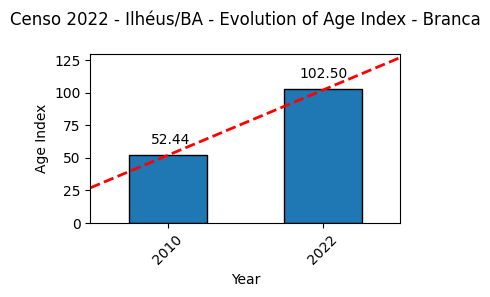

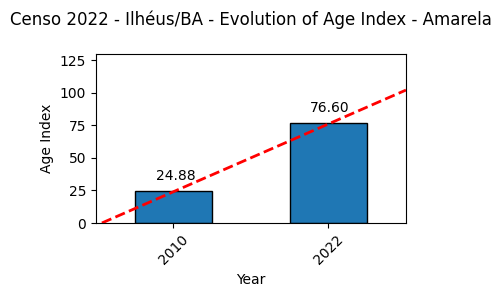

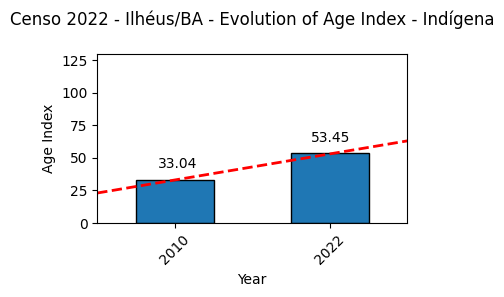

In [19]:
parda[['ano', 'indice_envelhecimento']].plot(kind='bar',
                                             x='ano',
                                             y='indice_envelhecimento',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Age Index - Parda\n',
                                             rot=45
                                            )

plt.axline((0, 36), (1, 79), linewidth=2, color='r', linestyle='--')
plt.text(-0.11, 45, '36.23')
plt.text(0.88, 88, '79.63')
plt.savefig('parda_env_index.png', dpi=300, bbox_inches='tight')
plt.show()
print('\n')


preta[['ano', 'indice_envelhecimento']].plot(kind='bar',
                                             x='ano',
                                             y='indice_envelhecimento',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Age Index - Preta\n',
                                             rot=45
                                            )

plt.axline((0, 47), (1, 95), linewidth=2, color='r', linestyle='--')
plt.text(-0.11, 56, '47.72')
plt.text(0.88, 104, '95.33')
plt.savefig('preta_env_index.png', dpi=300, bbox_inches='tight')
plt.show()
print('\n')


branca[['ano', 'indice_envelhecimento']].plot(kind='bar',
                                             x='ano',
                                             y='indice_envelhecimento',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Age Index - Branca\n',
                                             rot=45
                                            )

plt.axline((0, 52), (1, 102), linewidth=2, color='r', linestyle='--')
plt.text(-0.11, 61, '52.44')
plt.text(0.85, 111, '102.50')
plt.savefig('branca_env_index.png', dpi=300, bbox_inches='tight')
plt.show()
print('\n')


amarela[['ano', 'indice_envelhecimento']].plot(kind='bar',
                                             x='ano',
                                             y='indice_envelhecimento',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Age Index - Amarela\n',
                                             rot=45
                                            )

plt.axline((0, 24), (1, 76), linewidth=2, color='r', linestyle='--')
plt.text(-0.11, 33, '24.88')
plt.text(0.88, 85, '76.60')
plt.savefig('amarela_env_index.png', dpi=300, bbox_inches='tight')
plt.show()
print('\n')


indigena[['ano', 'indice_envelhecimento']].plot(kind='bar',
                                             x='ano',
                                             y='indice_envelhecimento',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Age Index - Indígena\n',
                                             rot=45
                                            )

plt.axline((0, 33), (1, 53), linewidth=2, color='r', linestyle='--')
plt.text(-0.11, 42, '33.04')
plt.text(0.88, 62, '53.45')
plt.savefig('indigena_env_index.png', dpi=300, bbox_inches='tight')
plt.show()

Age Index by race brings interesting information. All races had an increase in the the last 12 years.

However the increase was not the same:

- Indígena (indigenous) +20.42
- Parda (black mixed with white) +43.49
- Preta (black) +47.61
- Branca (while) +50.06
- Amarela (yellow - asian) +51.72

We can see that indigenous people had the lower increase, half of 2nd race Parda.

Observing from this point we can say that indigenous people were the ones who got less elderly while Asian people got more.

In [20]:
#Open the saved plot images on environment and save in variables
parda_env_index = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/parda_env_index.png')
preta_env_index = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/preta_env_index.png')
branca_env_index = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/branca_env_index.png')
amarela_env_index = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/amarela_env_index.png')
indigena_env_index = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/indigena_env_index.png')

#Pass the plots into Gemini to get more accurates insights
response = model.generate_content(('Get insights from these datasets about Ilhéus population', parda_env_index,                                                                                              preta_env_index,
                                                                                              branca_env_index,
                                                                                              amarela_env_index,
                                                                                              indigena_env_index))
print(response.text)

The datasets provide insights into the changing age demographics of different racial groups in Ilhéus, Brazil, between 2010 and 2022. Here's a breakdown:

**Overall Trend:**

- **Aging Population:** Every racial group shows a significant increase in the Age Index from 2010 to 2022. This indicates that the population of Ilhéus, across all races, is aging. 

**Specific Racial Groups:**

- **Parda (Mixed Race):** This group had an Age Index of 36.23 in 2010, rising to 79.63 in 2022.  This represents the largest numerical increase among all groups.
- **Preta (Black):**  The Age Index for this group increased from 47.72 to 95.33, a significant jump showing a rapidly aging Black population in Ilhéus.
- **Branca (White):** Starting with the highest Age Index in 2010 (52.44), the Branca group reached 102.50 in 2022. This suggests a continued trend of an aging White population, although the rate of increase is slightly less pronounced compared to other groups.
- **Amarela (Asian):** This group 

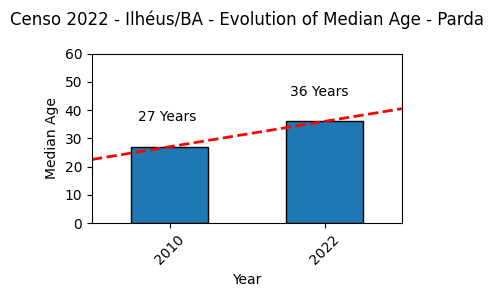

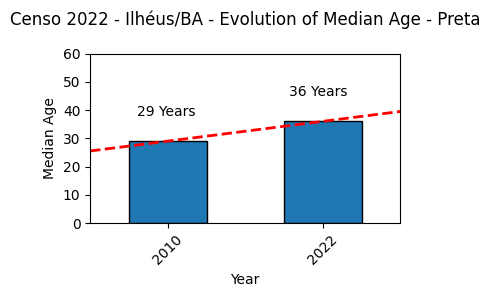

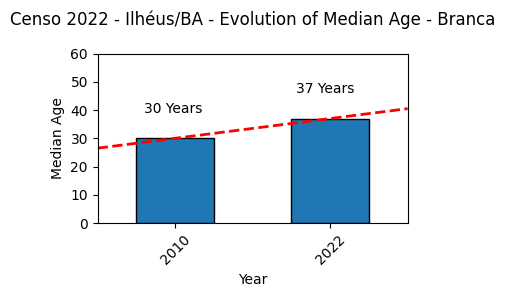

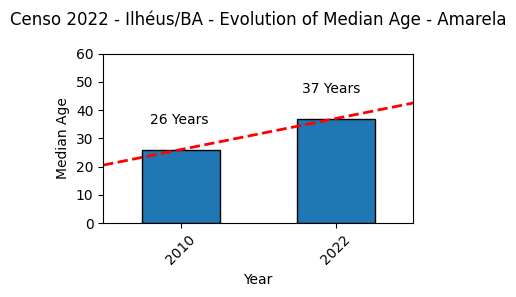

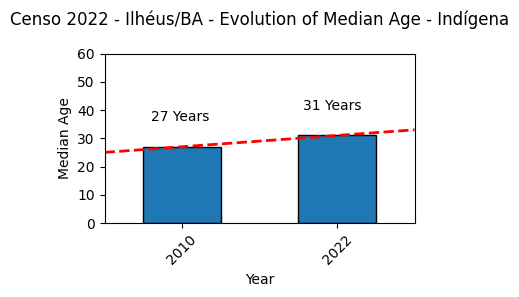

In [21]:
parda[['ano', 'idade_mediana']].plot(kind='bar',
                                             x='ano',
                                             y='idade_mediana',
                                             edgecolor='black',
                                             ylabel='Median Age',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 60),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Median Age - Parda\n',
                                             rot=45
                                            )

plt.axline((0, 27), (1, 36), linewidth=2, color='r', linestyle='--')
plt.text(-0.2, 36, '27 Years')
plt.text(0.78, 45, '36 Years')
plt.savefig('parda_med_age.png', dpi=300, bbox_inches='tight')
plt.show()
print('\n')

preta[['ano', 'idade_mediana']].plot(kind='bar',
                                             x='ano',
                                             y='idade_mediana',
                                             edgecolor='black',
                                             ylabel='Median Age',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 60),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Median Age - Preta\n',
                                             rot=45
                                            )

plt.axline((0, 29), (1, 36), linewidth=2, color='r', linestyle='--')
plt.text(-0.2, 38, '29 Years')
plt.text(0.78, 45, '36 Years')
plt.savefig('preta_med_age.png', dpi=300, bbox_inches='tight')
plt.show()
print('\n')

branca[['ano', 'idade_mediana']].plot(kind='bar',
                                             x='ano',
                                             y='idade_mediana',
                                             edgecolor='black',
                                             ylabel='Median Age',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 60),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Median Age - Branca\n',
                                             rot=45
                                            )

plt.axline((0, 30), (1, 37), linewidth=2, color='r', linestyle='--')
plt.text(-0.2, 39, '30 Years')
plt.text(0.78, 46, '37 Years')
plt.savefig('branca_med_age.png', dpi=300, bbox_inches='tight')
plt.show()
print('\n')

amarela[['ano', 'idade_mediana']].plot(kind='bar',
                                             x='ano',
                                             y='idade_mediana',
                                             edgecolor='black',
                                             ylabel='Median Age',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 60),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Median Age - Amarela\n',
                                             rot=45
                                            )

plt.axline((0, 26), (1, 37), linewidth=2, color='r', linestyle='--')
plt.text(-0.2, 35, '26 Years')
plt.text(0.78, 46, '37 Years')
plt.savefig('amarela_med_age.png', dpi=300, bbox_inches='tight')
plt.show()
print('\n')

indigena[['ano', 'idade_mediana']].plot(kind='bar',
                                             x='ano',
                                             y='idade_mediana',
                                             edgecolor='black',
                                             ylabel='Median Age',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 60),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Median Age - Indígena\n',
                                             rot=45
                                            )

plt.axline((0, 27), (1, 31), linewidth=2, color='r', linestyle='--')
plt.text(-0.2, 36, '27 Years')
plt.text(0.78, 40, '31 Years')
plt.savefig('indigena_med_age.png', dpi=300, bbox_inches='tight')
plt.show()


Regarding Median Age by race, we also see an increase in the the last 12 years.

However the increase was also not the same:

- Indígena (indigenous) +4 Years
- Preta (black) +7 Years
- Branca (while) +7 Years
- Parda (black mixed with white) +9 Years
- Amarela (yellow - asian) +11 Years

We can see that indigenous people again had the lower increase, almost half of 2nd races Black and White.

Observing from this point we can say that indigenous people again were the ones who got less elderly while Asian again people got more.

In [22]:
#Open the saved plot images on environment and save in variables
parda_med_age = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/parda_med_age.png')
preta_med_age = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/preta_med_age.png')
branca_med_age = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/branca_med_age.png')
amarela_med_age = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/amarela_med_age.png')
indigena_med_age = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/indigena_med_age.png')

#Pass the plots into Gemini to get more accurates insights
response = model.generate_content(('Get insights from these datasets about Ilhéus population', parda_med_age,
                                                                                              preta_med_age,
                                                                                              branca_med_age,
                                                                                              amarela_med_age,
                                                                                              indigena_med_age))
print(response.text)

The datasets provide insights into the changing age demographics of different racial groups in Ilhéus, Bahia, Brazil between 2010 and 2022. Here's a summary:

**Overall Trend:**

* **Aging Population:** Across all racial groups, there's a clear trend of an aging population, indicated by the increase in median age from 2010 to 2022. This suggests declining birth rates and potentially increasing life expectancy.

**Specific Racial Groups:**

* **Branca (White):** This group had the highest median age in both 2010 (30 years) and 2022 (37 years), indicating a more mature age structure compared to other groups.
* **Parda (Mixed Race):**  The median age for this group increased significantly from 27 to 36 years, the largest increase among all groups. 
* **Preta (Black):** Similar to the Parda group, the Preta population also experienced a notable rise in median age, from 29 to 36 years. 
* **Amarela (Yellow/Asian):**  While starting with the lowest median age in 2010 (26 years), this group a

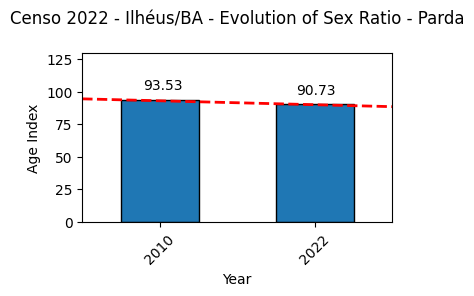

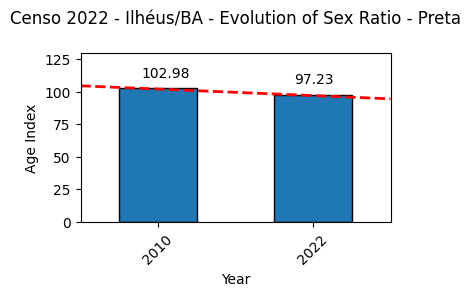

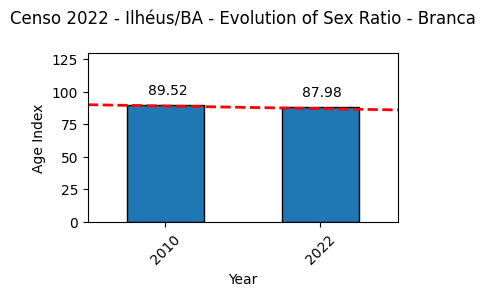

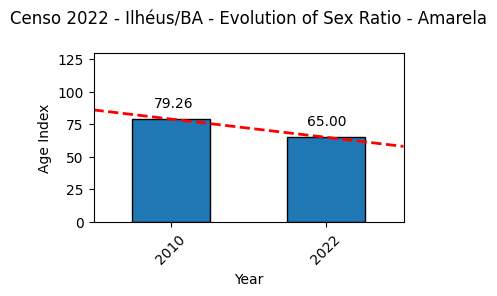

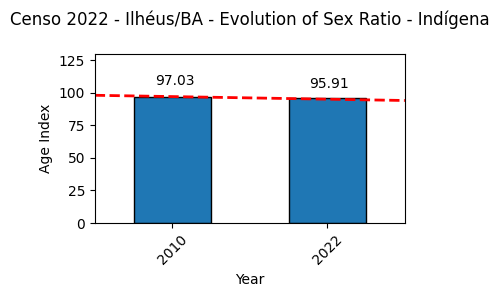

In [23]:
parda[['ano', 'razao_sexo']].plot(kind='bar',
                                             x='ano',
                                             y='razao_sexo',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Sex Ratio - Parda\n',
                                             rot=45
                                            )

plt.axline((0, 93), (1, 90), linewidth=2, color='r', linestyle='--')
plt.text(-0.11, 102, '93.53')
plt.text(0.88, 98, '90.73')
plt.savefig('parda_sex_ratio.png', dpi=300, bbox_inches='tight')
plt.show()
print('\n')

preta[['ano', 'razao_sexo']].plot(kind='bar',
                                             x='ano',
                                             y='razao_sexo',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Sex Ratio - Preta\n',
                                             rot=45
                                            )

plt.axline((0, 102), (1, 97), linewidth=2, color='r', linestyle='--')
plt.text(-0.11, 111, '102.98')
plt.text(0.88, 106, '97.23')
plt.savefig('preta_sex_ratio.png', dpi=300, bbox_inches='tight')
plt.show()
print('\n')

branca[['ano', 'razao_sexo']].plot(kind='bar',
                                             x='ano',
                                             y='razao_sexo',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Sex Ratio - Branca\n',
                                             rot=45
                                            )

plt.axline((0, 89), (1, 87), linewidth=2, color='r', linestyle='--')
plt.text(-0.11, 98, '89.52')
plt.text(0.88, 96, '87.98')
plt.savefig('branca_sex_ratio.png', dpi=300, bbox_inches='tight')
plt.show()
print('\n')

amarela[['ano', 'razao_sexo']].plot(kind='bar',
                                             x='ano',
                                             y='razao_sexo',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Sex Ratio - Amarela\n',
                                             rot=45
                                            )

plt.axline((0, 79), (1, 65), linewidth=2, color='r', linestyle='--')
plt.text(-0.11, 88, '79.26')
plt.text(0.88, 74, '65.00')
plt.savefig('amarela_sex_ratio.png', dpi=300, bbox_inches='tight')
plt.show()
print('\n')

indigena[['ano', 'razao_sexo']].plot(kind='bar',
                                             x='ano',
                                             y='razao_sexo',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Sex Ratio - Indígena\n',
                                             rot=45
                                            )

plt.axline((0, 97), (1, 95), linewidth=2, color='r', linestyle='--')
plt.text(-0.11, 106, '97.03')
plt.text(0.88, 104, '95.91')
plt.savefig('indigena_sex_ratio.png', dpi=300, bbox_inches='tight')
plt.show()


Regarding Sex Ratio by race, we see a decrease in all races in the last 12 years. Which means in general the male population decreases while the female increased.

However as expected, the decrease was also not the same:

- Indígena (indigenous) -1.12
- Branca (while) -1.54
- Parda (black mixed with white) -2.8
- Preta (black) -5.75
- Amarela (yellow - asian) -14.26

We can see that indigenous people again had the lower increase on female population, compared to the biggest is about 14 times less.

It's also interesting to observe that only Black people had more men in 2010 and now female in 2022.

Indigenous and Black people have the most distributed polulation between men and women (indexes 95.91 and 97.23 - 100 means equal distribution), while Asian people has the less distributed with big majority women (index 65).

In [24]:
#Open the saved plot images on environment and save in variables
parda_sex_ratio = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/parda_sex_ratio.png')
preta_sex_ratio = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/preta_sex_ratio.png')
branca_sex_ratio = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/branca_sex_ratio.png')
amarela_sex_ratio = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/amarela_sex_ratio.png')
indigena_sex_ratio = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/indigena_sex_ratio.png')

#Pass the plots into Gemini to get more accurates insights
response = model.generate_content(('Get insights from these datasets about Ilhéus population', parda_sex_ratio,
                                                                                              preta_sex_ratio,
                                                                                              branca_sex_ratio,
                                                                                              amarela_sex_ratio,
                                                                                              indigena_sex_ratio))
print(response.text)

The graphs show the evolution of the sex ratio in Ilhéus between the 2010 and 2022 censuses, broken down by race. Here are some insights:

**General Trends:**

* **Decreasing Sex Ratio:**  For almost all racial groups (except Indigenous), the sex ratio has slightly decreased from 2010 to 2022. This indicates a growing proportion of females compared to males in these groups.
* **Above 100:**  Except for the "Amarela" (Yellow) category, all other groups consistently maintain a sex ratio close to or slightly above 100. This signifies that there are either slightly more males or an almost equal number of males and females within those racial categories.

**Insights by Race:**

* **Parda (Mixed Race):**  The sex ratio for the "Parda" population is slightly above 100 in both years, indicating a near balance between males and females. The decrease suggests a slight increase in the female population.
* **Preta (Black):** This group shows a similar trend to "Parda" with a slight decrease in the

Now let's check the proportion of Men x Women

In [25]:
men_women = df_pop_res_mun[['sexo', 'populacao_residente']].replace(['Homens', 'Mulheres'], ['Men', 'Women']).groupby('sexo').sum()
men_women



populacao_residente
sexo                      
Men                85524.0
Women              93077.0

In [26]:
men_women_new = pd.DataFrame(data=[[85524.0, 93077.0]], columns=['Men', 'Women'], index=['Sex'])
men_women_new


Men    Women
Sex  85524.0  93077.0

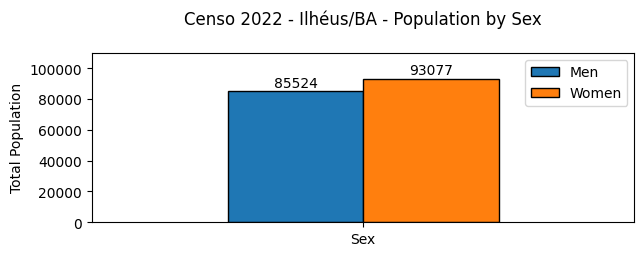

In [27]:
men_women_new.plot(kind='bar',
               ylabel='Total Population',
               figsize=(7,2.2),
               ylim=(0, 110000),
               title='Censo 2022 - Ilhéus/BA - Population by Sex\n',
               rot=0,
               edgecolor='black',

               )

plt.text(-0.165, 87524, '85524')
plt.text(0.084, 96077, '93077')
plt.show()



85k Men x 93k Women in Ilhéus, let's check in %

In [28]:
men_women_perc = ((men_women/men_women.sum())*100)
men_women_perc

men_women_perc_new = pd.DataFrame(data=[[47.88551, 52.11449]], columns=['Men', 'Women'], index=['Sex'])
men_women_perc_new


Men     Women
Sex  47.88551  52.11449

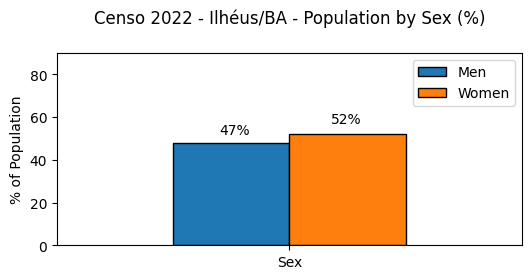

In [29]:
men_women_perc_new.plot(kind='bar',
               ylabel='% of Population',
               figsize=(6,2.5),
               ylim=(0, 90),
               title='Censo 2022 - Ilhéus/BA - Population by Sex (%)\n',
               rot=0,
               edgecolor='black'
                                            )

plt.text(-0.15, 52, '47%')
plt.text(0.09, 57, '52%')
plt.show()

Population of Women in 2022 is 5% higher than men, and compared to 2010, the female population seems to be increasing.

Regarding age, during Censo 2022 we had date of birth (DOB) checked and presumed, let's check it.

In [30]:
dec_age = df_pop_res_mun[['forma_declaracao_idade', 'populacao_residente', 'sexo']].replace(['Data de nascimento', 'Idade presumida', 'Homens', 'Mulheres'], ['Real DOB', 'Presumed DOB', 'Men', 'Women']).groupby(['forma_declaracao_idade', 'sexo']).sum()
dec_age


dec_age_new = pd.DataFrame(data=[[16670.0, 15575.0], [68854.0, 77502.0]], columns=['Men', 'Women'], index=['Presumed DOB', 'Real DOB'])
dec_age_new


Men    Women
Presumed DOB  16670.0  15575.0
Real DOB      68854.0  77502.0

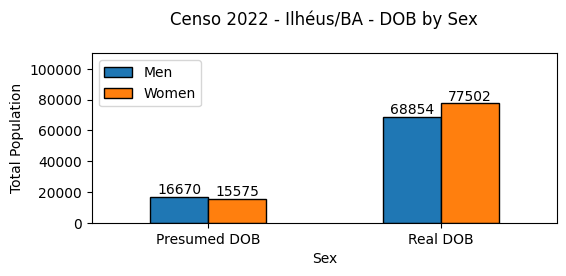

In [31]:
dec_age_new.plot(kind='bar',
               ylabel='Total Population',
               xlabel='Sex',
               figsize=(6,2.2),
               ylim=(0, 110000),
               rot=0,
               title='Censo 2022 - Ilhéus/BA - DOB by Sex\n',
               edgecolor='black'
                                            )

plt.text(-0.22, 18770, '16670')
plt.text(0.03, 17575, '15575')
plt.text(0.78, 70854, '68854')
plt.text(1.03, 79502, '77502')

plt.show()

In [32]:
dec_age_perc = (dec_age / dec_age.sum())*100
dec_age_perc

dec_age_perc_new = pd.DataFrame(data=[[9.333654, 8.720556], [38.551856, 43.393934]], columns=['Men', 'Women'], index=['Presumed DOB', 'Real DOB'])
dec_age_perc_new

Men      Women
Presumed DOB   9.333654   8.720556
Real DOB      38.551856  43.393934

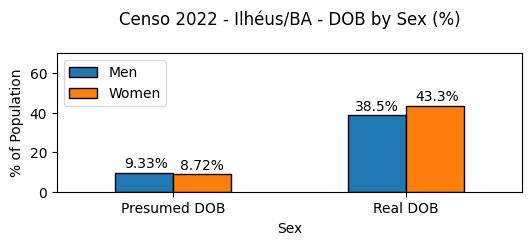

In [33]:
dec_age_perc_new.plot(kind='bar',
               ylabel='% of Population',
               xlabel='Sex',
               figsize=(6,1.8),
               ylim=(0, 70),
               title='Censo 2022 - Ilhéus/BA - DOB by Sex (%)\n',
               edgecolor='black',
               rot=0

                                            )

plt.text(-0.21, 12, '9.33%'), plt.text(0.03, 11, '8.72%')
plt.text(0.78, 41, '38.5%'), plt.text(1.04, 46, '43.3%')
plt.savefig('dec_age_perc_new.png', dpi=300, bbox_inches='tight')
plt.show()

We can conclude here that regarding age, about 18% of the ages were not really collected but presumed by the agent, only 82% is real DOB

It seems well distributed by sex.

In [34]:
#Open the saved plot image on environment and save in a variable
dec_age_perc_new = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/dec_age_perc_new.png')

#Pass the plot into Gemini to get more accurates insights
response = model.generate_content(('Get insights from this dataset about Ilhéus population', dec_age_perc_new))
print(response.text)

The 2022 census data from Ilhéus, Brazil, reveals a significant disparity in the availability of accurate Date of Birth (DOB) information based on gender.

**Key Insights:**

* **Presumed DOB:** A mere 9.33% of men and 8.72% of women in Ilhéus have a presumed DOB recorded. This suggests a considerable gap in birth registration and documentation, especially during the time periods these individuals were born. 
* **Real DOB:** The situation improves drastically with Real DOB data. 38.5% of men and 43.3% of women have their actual DOB recorded. This highlights a positive trend in accurate birth registration in more recent times.
* **Gender Disparity:** Interestingly, a slightly higher percentage of women possess Real DOB records compared to men. This could point towards various socio-cultural factors influencing birth registration practices, potentially indicating a greater emphasis on registering female births. 

**Overall:**

The data underscores the need for continued efforts to improv

Let's check how distributed is the Age Groups.

In [35]:
#This is to correct idade_anos column and create a proper age_group, there are many division here and this is not necessary
df_pop_res_mun_copy = df_pop_res_mun

age_ranges = []
for i in df_pop_res_mun['idade_anos']:
    if math.isnan(i):
        age_ranges.append('-12 Years')

    elif i < 12:
        age_ranges.append('-12 Years')

    elif i >= 12 and i <18:
        age_ranges.append('12 to 17 Years')

    elif i >= 18 and i <65:
        age_ranges.append('18 to 65 Years')

    else:
        age_ranges.append('+65 Years')

df_pop_res_mun_copy['idade_anos_corr'] = age_ranges

df_pop_res_mun_copy

id_municipio forma_declaracao_idade      sexo    idade  idade_anos  \
0         2913606     Data de nascimento    Homens    1 mês         NaN   
1         2913606        Idade presumida    Homens   2 anos        2.00   
2         2913606        Idade presumida  Mulheres   2 anos        2.00   
3         2913606     Data de nascimento  Mulheres   3 anos        3.00   
4         2913606     Data de nascimento  Mulheres   5 anos        5.00   
..            ...                    ...       ...      ...         ...   
439       2913606        Idade presumida    Homens  3 meses        0.25   
440       2913606        Idade presumida    Homens  94 anos       94.00   
441       2913606        Idade presumida  Mulheres  95 anos       95.00   
442       2913606        Idade presumida    Homens  91 anos       91.00   
443       2913606     Data de nascimento    Homens  92 anos       92.00   

          grupo_idade  populacao_residente idade_anos_corr  
0    100 anos ou mais                 68.0       -12 Years  
1          0 a 4 anos                131.0       -12 Years  
2          0 a 4 anos                117.0       -12 Years  
3          0 a 4 anos                952.0       -12 Years  
4          5 a 9 anos                892.0       -12 Years  
..                ...                  ...             ...  
439        0 a 4 anos                  9.0       -12 Years  
440      90 a 94 anos                 10.0       +65 Years  
441      95 a 99 anos                 10.0       +65 Years  
442      90 a 94 anos                 12.0       +65 Years  
443      90 a 94 anos                 31.0       +65 Years  

[444 rows x 8 columns]

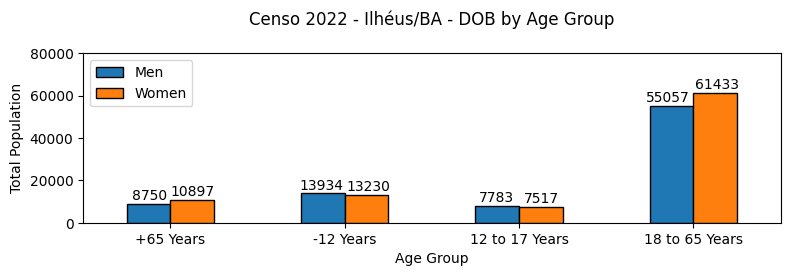

In [36]:
#select proper columns
pop_age_sex = df_pop_res_mun[['idade_anos_corr', 'populacao_residente', 'sexo']].replace(['Homens', 'Mulheres'], ['Men', 'Women']).groupby(['idade_anos_corr', 'sexo']).sum()

#create a new dataset because the group by output doesn't allow to change bar colors
pop_age_sex_new = pd.DataFrame(data=[[8750.0, 10897.0], [13934.0, 13230.0], [7783.0, 7517.0], [55057.0, 61433.0]], columns=['Men', 'Women'], index=['+65 Years', '-12 Years', '12 to 17 Years', '18 to 65 Years'])
pop_age_sex_new

#plot
pop_age_sex_new.plot(kind='bar',
               ylabel='Total Population',
               xlabel='Age Group',
               figsize=(9,2.2),
               ylim=(0, 80000),
               title='Censo 2022 - Ilhéus/BA - DOB by Age Group\n',
               rot=0,
               edgecolor='black',
                                            )

plt.text(-0.22, 10770, '8750'), plt.text(0.74, 15575, '13934')
plt.text(1.77, 9783, '7783'), plt.text(2.73, 57057, '55057')

plt.text(0.0, 12897, '10897'), plt.text(1.01, 15230, '13230')
plt.text(2.03, 9517, '7517'), plt.text(3.01, 63433, '61433')


plt.show()

Most part of Ilhéus population is in the 18 to 65 years range, followed by less than 12, more than 65 and 12 to 17.

By sex it seems well distributed, with female slighly higher.

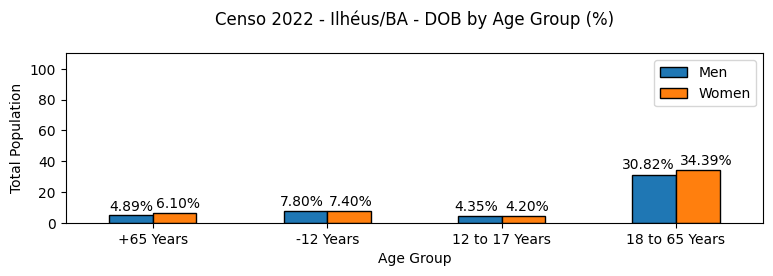

In [37]:
#convert to %
pop_age_sex_perc = (pop_age_sex / pop_age_sex.sum())*100

#create a new dataset because the group by output doesn't allow to change bar colors
pop_age_sex_perc_new = pd.DataFrame(data=[[4.89, 6.10], [7.80, 7.40], [4.35, 4.20], [30.82, 34.39]], columns=['Men', 'Women'], index=['+65 Years', '-12 Years', '12 to 17 Years', '18 to 65 Years'])
pop_age_sex_perc_new

#plot
pop_age_sex_perc_new.plot(kind='bar',
               ylabel='Total Population',
               xlabel='Age Group',
               figsize=(9,2.2),
               ylim=(0, 110),
               title='Censo 2022 - Ilhéus/BA - DOB by Age Group (%)\n',
               rot=0,
               edgecolor='black',
                                            )

plt.text(-0.25, 8, '4.89%'), plt.text(0.73, 11, '7.80%')
plt.text(1.73, 8, '4.35%'), plt.text(2.69, 35, '30.82%')
plt.text(0.02, 10, '6.10%'), plt.text(1.01, 11, '7.40%')
plt.text(2.02, 8, '4.20%'), plt.text(3.02, 38, '34.39%')

plt.savefig('pop_age_sex_perc_new.png', dpi=300, bbox_inches='tight')
plt.show()

Same as before but in percentage.

- +65% of Ilhéus population is in the 18 to 65 years range;
- +15% less than 12;
- +11% more than 65;
- +8% from 12 to 17.

In [38]:
#Open the saved plot image on environment and save in a variable
pop_age_sex_perc_new = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/pop_age_sex_perc_new.png')

#Pass the plot into Gemini to get more accurates insights
response = model.generate_content(('Get insights from this dataset about Ilhéus population', pop_age_sex_perc_new))
print(response.text)

The population pyramid provides the following insights about the population of Ilhéus, BA based on data from Censo 2022:

**Age Structure:**

* **Working-age dominance:** The most prominent feature is the large proportion of the population aged 18 to 65 years (30.82% men, 34.39% women). This indicates a significant working-age population.
* **Small elderly population:** The group aged 65 years and above is relatively small (4.89% men, 6.10% women). This suggests a younger population overall.
* **Comparable youth:** The proportions of those under 18 years old are relatively similar across age groups, with slightly higher percentages for the under-12 category.

**Gender Distribution:**

* **Slightly more women:** In almost every age group, there are slightly more women than men. This difference is most noticeable in the 18 to 65 years age group, suggesting a possible life expectancy gap.

**Overall:**

The population pyramid suggests that Ilhéus has a relatively young population dominate

In [39]:
#This is to correct idade_anos column and create a proper age_group, there are many division here and this is not necessary
df_pop_res_cor_raca_copy = df_pop_res_cor_raca

age_ranges1 = []
for i in df_pop_res_cor_raca_copy['grupo_idade']:

    if i == '0 a 4 anos' or i == '5 a 9 anos':
       age_ranges1.append('0 to 9 Years')

    elif i == '10 a 14 anos' or i == '15 a 19 anos':
      age_ranges1.append('10 to 19 Years')

    elif i == '20 a 24 anos' or i == '25 a 29 anos':
      age_ranges1.append('20 to 29 Years')

    elif i == '30 a 34 anos' or i == '35 a 39 anos':
      age_ranges1.append('30 to 39 Years')

    elif i == '40 a 44 anos' or i == '45 a 49 anos':
      age_ranges1.append('40 to 49 Years')

    elif i == '50 a 54 anos' or i == '55 a 59 anos':
      age_ranges1.append('50 to 59 Years')

    elif i == '60 a 64 anos' or i == '65 a 69 anos':
      age_ranges1.append('60 to 69 Years')

    elif i == '70 a 74 anos' or i == '75 a 79 anos':
      age_ranges1.append('70 to 79 Years')

    else:
      age_ranges1.append('+80 Years')

df_pop_res_cor_raca_copy['grupo_idade_corr'] = age_ranges1

df_pop_res_cor_raca_copy

ano  id_municipio       grupo_idade      sexo  cor_raca  \
0    2022       2913606        0 a 4 anos    Homens     Parda   
1    2022       2913606        0 a 4 anos  Mulheres    Branca   
2    2010       2913606        0 a 4 anos  Mulheres   Amarela   
3    2022       2913606        0 a 4 anos  Mulheres  Indígena   
4    2010       2913606        0 a 4 anos    Homens  Indígena   
..    ...           ...               ...       ...       ...   
415  2022       2913606  100 anos ou mais    Homens    Branca   
416  2022       2913606  100 anos ou mais  Mulheres     Preta   
417  2010       2913606  100 anos ou mais    Homens     Parda   
418  2010       2913606  100 anos ou mais  Mulheres     Preta   
419  2022       2913606  100 anos ou mais  Mulheres     Parda   

     populacao_residente grupo_idade_corr  
0                 3080.0     0 to 9 Years  
1                 1062.0     0 to 9 Years  
2                   63.0     0 to 9 Years  
3                  331.0     0 to 9 Years  
4                  149.0     0 to 9 Years  
..                   ...              ...  
415                  6.0        +80 Years  
416                  7.0        +80 Years  
417                  8.0        +80 Years  
418                 10.0        +80 Years  
419                 18.0        +80 Years  

[420 rows x 7 columns]

In [ ]:
#pop_age_race_parda_2010_df_perc = (pop_age_race_parda_2010_df / pop_age_race_parda_2010_df.sum()) * 100

#parda_men_values_2010_perc = list(pop_age_race_parda_2010_df_perc['Men'].values)
#parda_women_values_2010_perc = list(pop_age_race_parda_2010_df_perc['Women'].values)
#parda_comb_men_women_2010_perc = [[parda_men_values_2010_perc[i], parda_women_values_2010_perc[i]] for i in range(len(parda_men_values_2010_perc))]

#parda_comb_men_women_2010_perc


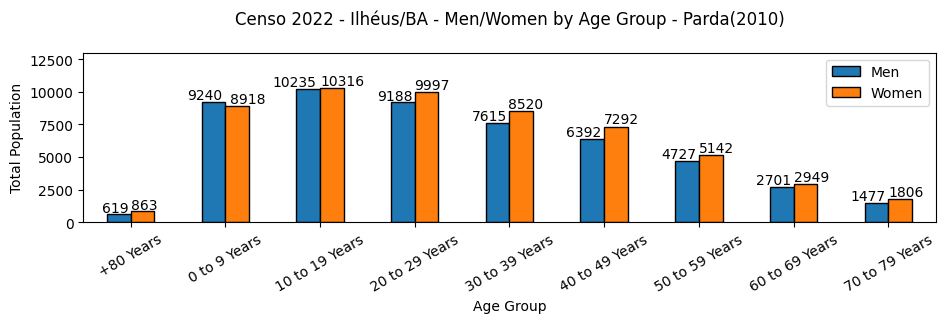

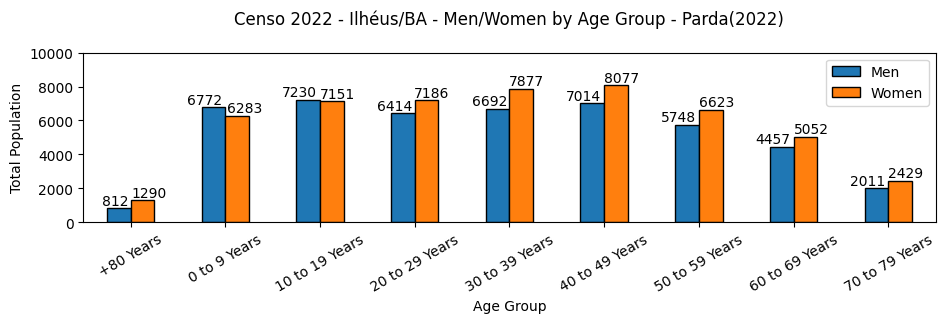

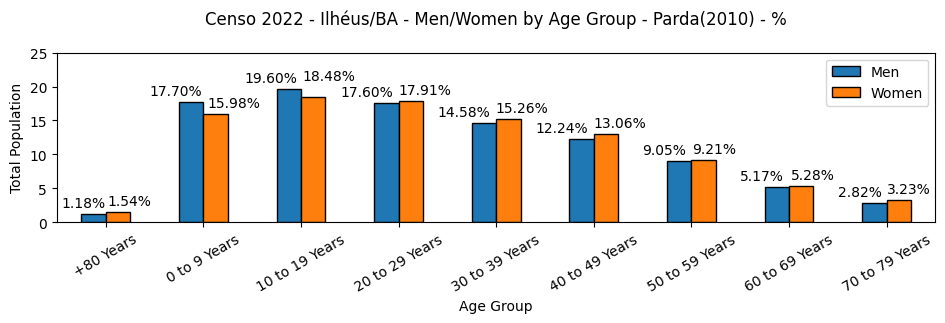

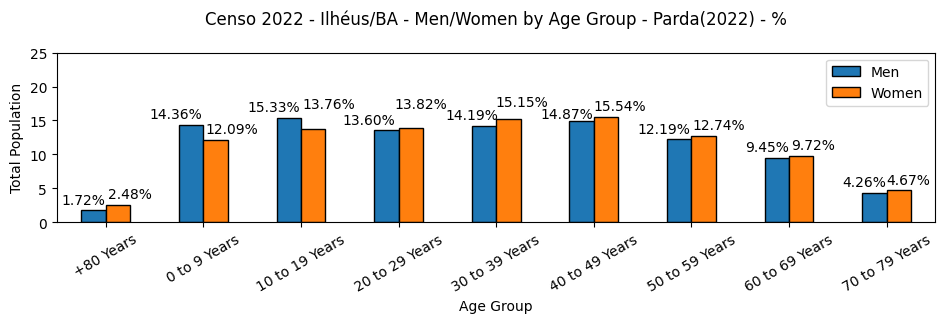

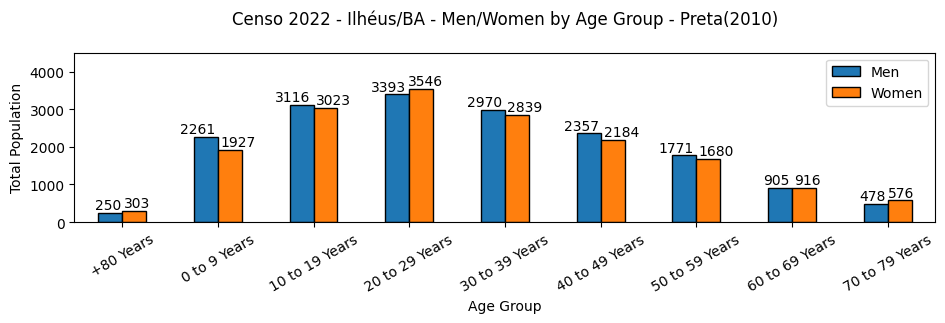

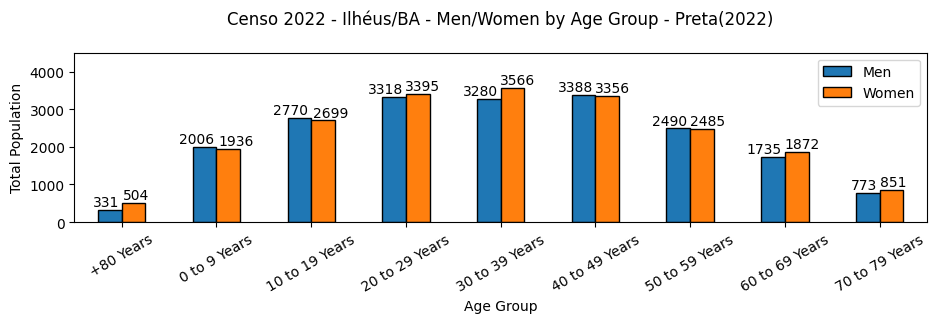

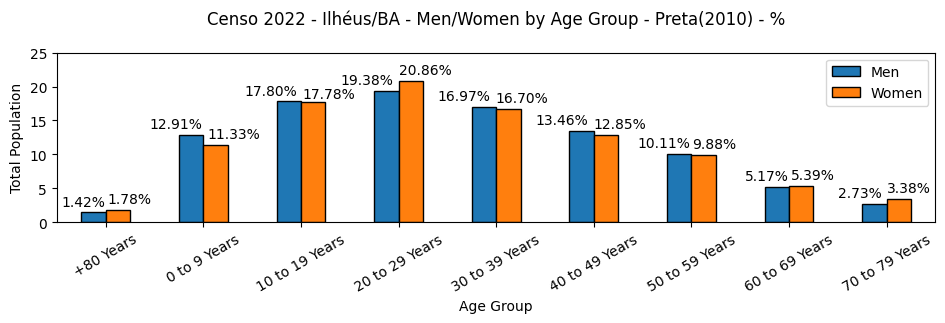

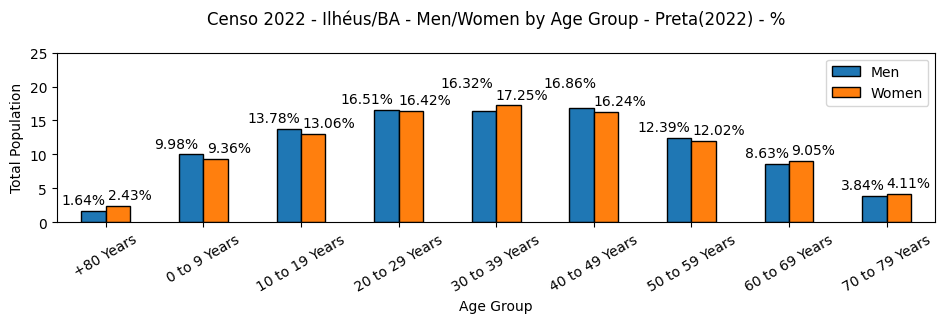

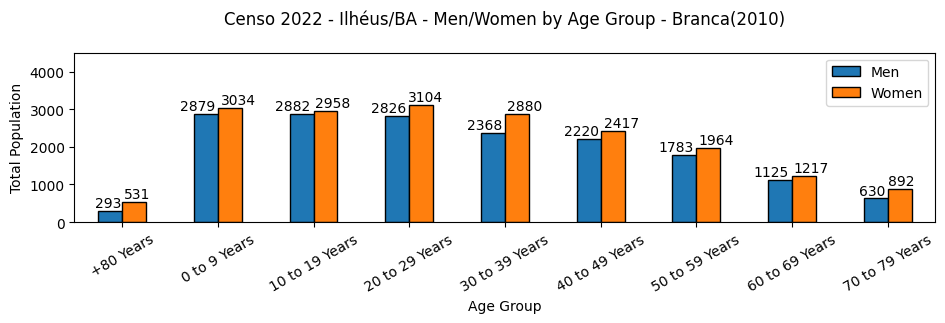

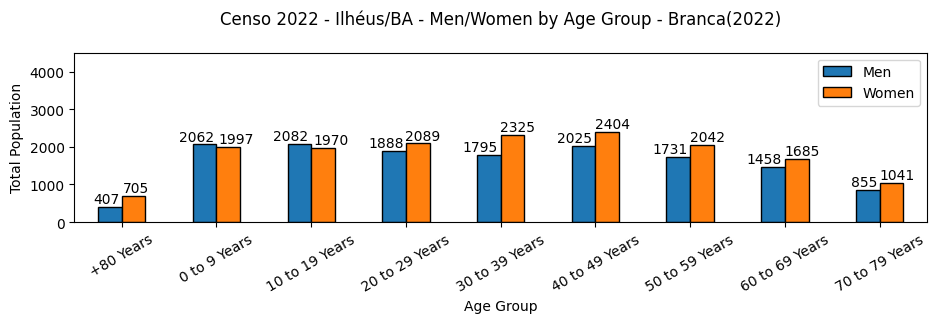

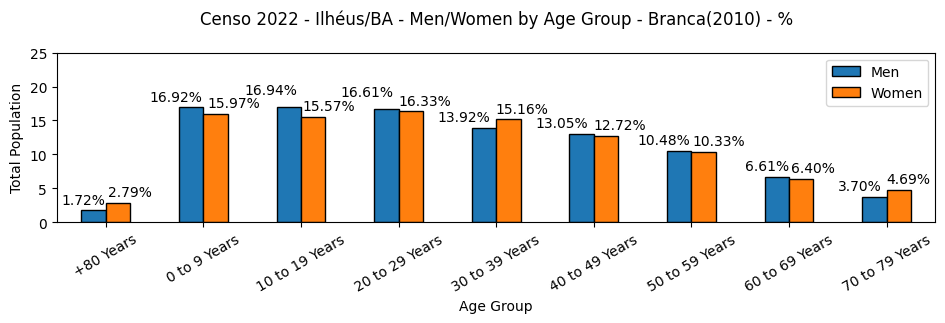

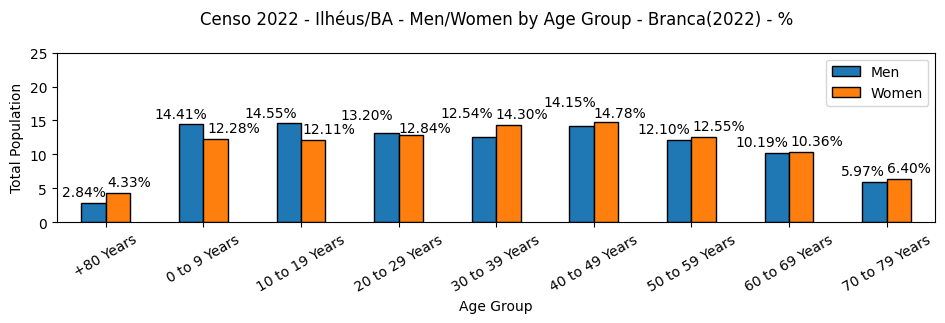

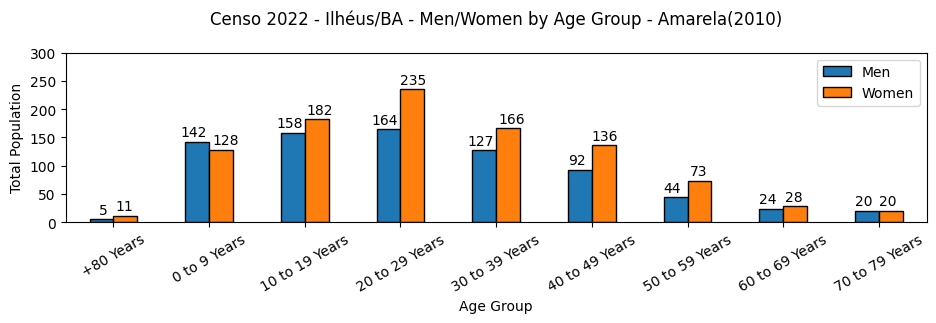

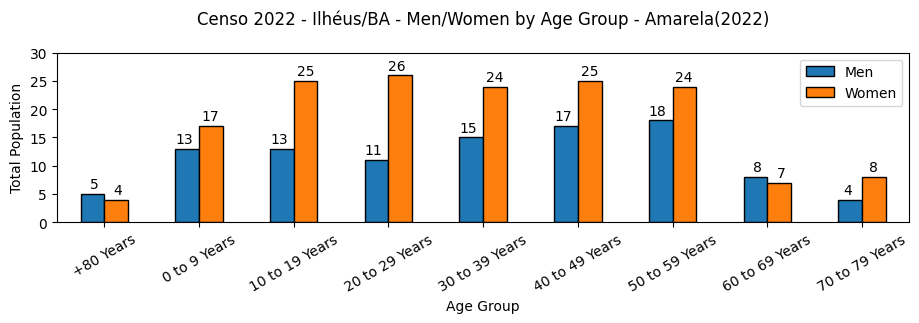

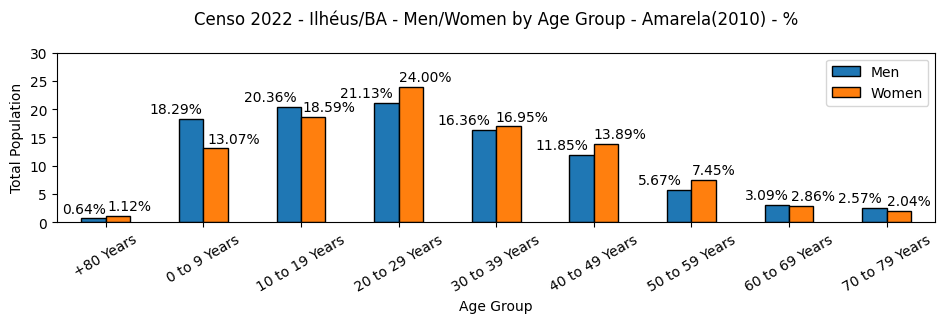

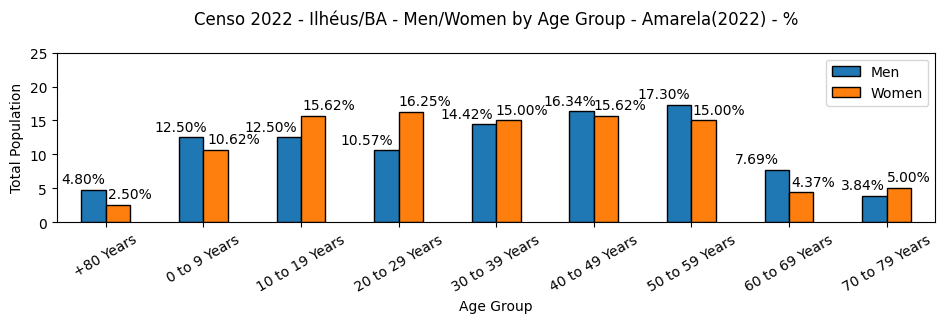

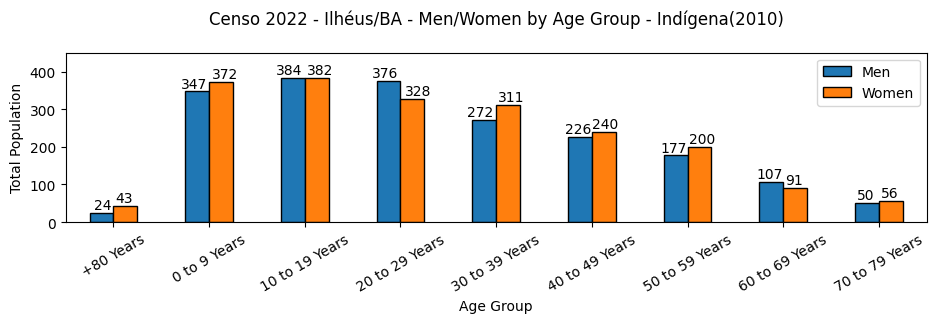

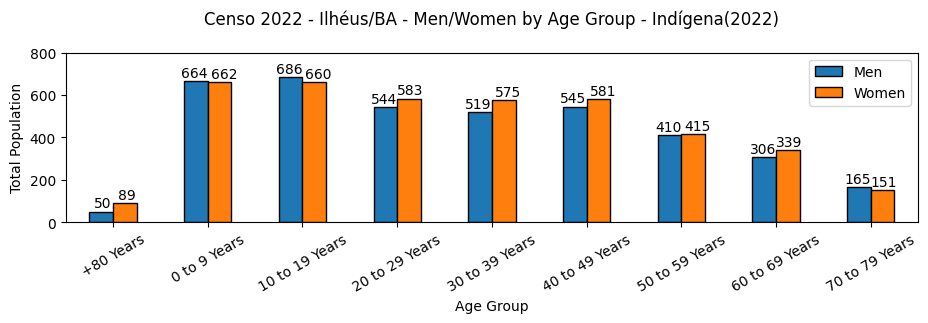

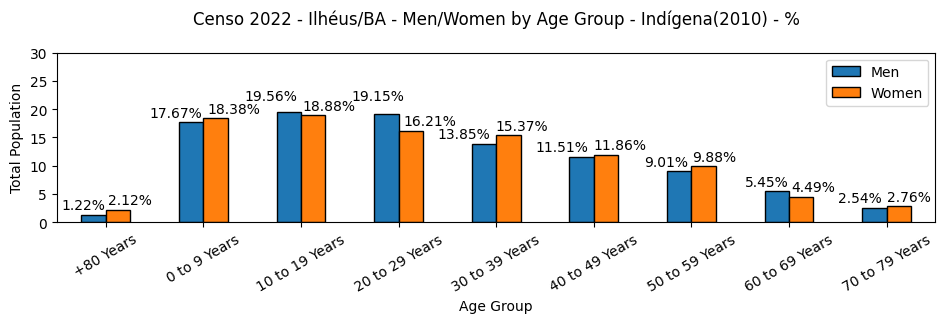

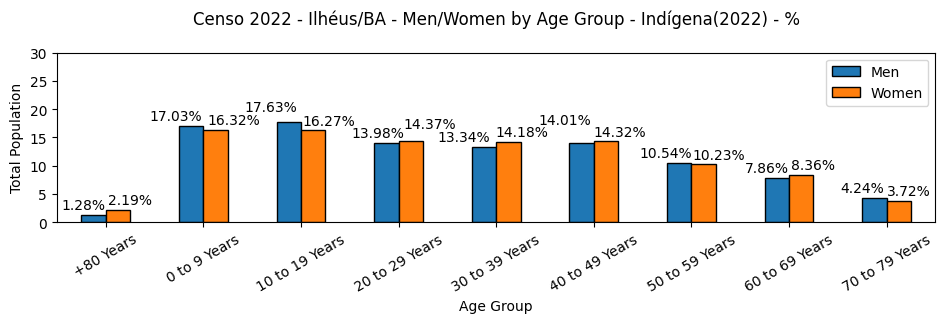

In [40]:
#Get the sum and reset index of the required data
pop_age_race = df_pop_res_cor_raca_copy[['ano', 'grupo_idade_corr', 'sexo', 'cor_raca', 'populacao_residente']].replace(['Homens', 'Mulheres'], ['Men', 'Women']).groupby(['ano', 'grupo_idade_corr', 'sexo', 'cor_raca']).sum().reset_index()


#Generate 2 small views to get the values for the plot Parda 2010
parda_men_values_2010 = list(pop_age_race[(pop_age_race['ano'] == 2010) &  (pop_age_race['cor_raca'] == 'Parda') &
 (pop_age_race['sexo'] == 'Men')]['populacao_residente'].values)

parda_women_values_2010 = list(pop_age_race[(pop_age_race['ano'] == 2010) & (pop_age_race['cor_raca'] == 'Parda') &
 (pop_age_race['sexo'] == 'Women')]['populacao_residente'].values)

parda_comb_men_women_2010 = [[parda_men_values_2010[i], parda_women_values_2010[i]] for i in range(len(parda_men_values_2010))]


#List of categories to be used as indexes in the following plots
age_range_every_10_years_list = ['+80 Years', '0 to 9 Years', '10 to 19 Years', '20 to 29 Years',
                         '30 to 39 Years', '40 to 49 Years', '50 to 59 Years', '60 to 69 Years',
                         '70 to 79 Years']


#Create a plot based on the data
pop_age_race_parda_2010_df = pd.DataFrame(data=parda_comb_men_women_2010,
                          columns=['Men', 'Women'],
                          index=age_range_every_10_years_list)
plt.rc('font', size=10)
pop_age_race_parda_2010_df.plot(kind='bar',
                                ylabel='Total Population',
                                xlabel='Age Group',
                                figsize=(11,2.2),
                                ylim=(0, 13000),
                                title='Censo 2022 - Ilhéus/BA - Men/Women by Age Group - Parda(2010)\n',
                                rot=30,
                                edgecolor='black',
                                                  )

plt.text(-0.3, 799, '619'), plt.text(0.01, 1003, '863'), plt.text(0.6, 9440, '9240'), plt.text(1.05, 9118, '8918')
plt.text(1.5, 10435, '10235') , plt.text(2.0, 10516, '10316'), plt.text(2.6, 9388, '9188'), plt.text(2.99, 10197, '9997')
plt.text(3.6, 7815, '7615'), plt.text(3.99, 8720, '8520'), plt.text(4.6, 6592, '6392'), plt.text(5.0, 7592, '7292')
plt.text(5.6, 4927, '4727'), plt.text(6.0, 5342, '5142'), plt.text(6.6, 2901, '2701'), plt.text(7.0, 3149, '2949')
plt.text(7.6, 1677, '1477'), plt.text(8.0, 2006, '1806')

plt.show()

print('\n')

#Generate 2 small views to get the values for the plot Parda 2022
parda_men_values_2022 = list(pop_age_race[(pop_age_race['ano'] == 2022) & (pop_age_race['cor_raca'] == 'Parda') &
 (pop_age_race['sexo'] == 'Men')]['populacao_residente'].values)

parda_women_values_2022 = list(pop_age_race[(pop_age_race['ano'] == 2022) & (pop_age_race['cor_raca'] == 'Parda') &
 (pop_age_race['sexo'] == 'Women')]['populacao_residente'].values)

parda_comb_men_women_2022 = [[parda_men_values_2022[i], parda_women_values_2022[i]] for i in range(len(parda_men_values_2022))]


#Create a plot based on the data
pop_age_race_parda_2022_df = pd.DataFrame(data=parda_comb_men_women_2022,
                          columns=['Men', 'Women'],
                          index=age_range_every_10_years_list)

pop_age_race_parda_2022_df.plot(kind='bar',
                                ylabel='Total Population',
                                xlabel='Age Group',
                                figsize=(11,2.2),
                                ylim=(0, 10000),
                                title='Censo 2022 - Ilhéus/BA - Men/Women by Age Group - Parda(2022)\n',
                                rot=30,
                                edgecolor='black',
                                                  )

plt.text(-0.3, 1012, '812'), plt.text(0.01, 1490, '1290'), plt.text(0.6, 6972, '6772'), plt.text(1.02, 6483, '6283')
plt.text(1.6, 7430, '7230') , plt.text(2.0, 7351, '7151'), plt.text(2.6, 6614, '6414'), plt.text(2.99, 7386, '7186')
plt.text(3.6, 6892, '6692'), plt.text(3.99, 8077, '7877'), plt.text(4.6, 7214, '7014'), plt.text(5.0, 8277, '8077')
plt.text(5.6, 5948, '5748'), plt.text(6.0, 6823, '6623'), plt.text(6.6, 4657, '4457'), plt.text(7.0, 5252, '5052')
plt.text(7.6, 2211, '2011'), plt.text(8.0, 2629, '2429')

plt.show()
print('\n')
print('\n')


#Parda 2010 in %
pop_age_race_parda_2010_df_perc = (pop_age_race_parda_2010_df / pop_age_race_parda_2010_df.sum()) * 100

parda_men_values_2010_perc = list(pop_age_race_parda_2010_df_perc['Men'].values)
parda_women_values_2010_perc = list(pop_age_race_parda_2010_df_perc['Women'].values)
parda_comb_men_women_2010_perc = [[parda_men_values_2010_perc[i], parda_women_values_2010_perc[i]] for i in range(len(parda_men_values_2010_perc))]


pop_age_race_parda_2010_df_perc = pd.DataFrame(data=parda_comb_men_women_2010_perc,
                                              columns=['Men', 'Women'],
                                              index=age_range_every_10_years_list)


pop_age_race_parda_2010_df_perc.plot(kind='bar',
                                ylabel='Total Population',
                                xlabel='Age Group',
                                figsize=(11.335,2.2),
                                ylim=(0, 25),
                                title='Censo 2022 - Ilhéus/BA - Men/Women by Age Group - Parda(2010) - %\n',
                                rot=30,
                                edgecolor='black',
                                                  )

plt.text(-0.45, 2.18, '1.18%'), plt.text(0.02, 2.54, '1.54%'), plt.text(0.45, 18.70, '17.70%'), plt.text(1.04, 16.98, '15.98%')
plt.text(1.42, 20.60, '19.60%') , plt.text(2.02, 21, '18.48%'), plt.text(2.4, 18.6, '17.60%'), plt.text(3.00, 18.91, '17.91%')
plt.text(3.4, 15.68, '14.58%'), plt.text(3.99, 16.26, '15.26%'), plt.text(4.4, 13.24, '12.24%'), plt.text(5.0, 14.06, '13.06%')
plt.text(5.5, 10.05, '9.05%'), plt.text(6.01, 10.21, '9.21%'), plt.text(6.5, 6.17, '5.17%'), plt.text(7.02, 6.28, '5.28%')
plt.text(7.5, 3.82, '2.82%'), plt.text(8.0, 4.23, '3.23%')
plt.savefig('parda_2010_perc.png', dpi=300, bbox_inches='tight')
plt.show()
print('\n')


#Parda 2022 in %
pop_age_race_parda_2022_df_perc = (pop_age_race_parda_2022_df / pop_age_race_parda_2022_df.sum()) * 100

parda_men_values_2022_perc = list(pop_age_race_parda_2022_df_perc['Men'].values)
parda_women_values_2022_perc = list(pop_age_race_parda_2022_df_perc['Women'].values)
parda_comb_men_women_2022_perc = [[parda_men_values_2022_perc[i], parda_women_values_2022_perc[i]] for i in range(len(parda_men_values_2022_perc))]


pop_age_race_parda_2022_df_perc = pd.DataFrame(data=parda_comb_men_women_2022_perc,
                                              columns=['Men', 'Women'],
                                              index=age_range_every_10_years_list)


pop_age_race_parda_2022_df_perc.plot(kind='bar',
                                ylabel='Total Population',
                                xlabel='Age Group',
                                figsize=(11.335,2.2),
                                ylim=(0, 25),
                                title='Censo 2022 - Ilhéus/BA - Men/Women by Age Group - Parda(2022) - %\n',
                                rot=30,
                                edgecolor='black',
                                                  )

plt.text(-0.45, 2.72, '1.72%'), plt.text(0.02, 3.48, '2.48%'), plt.text(0.45, 15.36, '14.36%'), plt.text(1.02, 13.09, '12.09%')
plt.text(1.45, 16.33, '15.33%') , plt.text(2.02, 16.8, '13.76%'), plt.text(2.425, 14.5, '13.60%'), plt.text(2.96, 16.82, '13.82%')
plt.text(3.48, 15.25, '14.19%'), plt.text(3.99, 17.15, '15.15%'), plt.text(4.45, 15.37, '14.87%'), plt.text(5.0, 16.54, '15.54%')
plt.text(5.45, 13.19, '12.19%'), plt.text(6.01, 13.74, '12.74%'), plt.text(6.55, 10.45, '9.45%'), plt.text(7.02, 10.72, '9.72%')
plt.text(7.55, 5.26, '4.26%'), plt.text(8.0, 5.67, '4.67%')
plt.savefig('parda_2022_perc.png', dpi=300, bbox_inches='tight')
plt.show()
print('\n')
print('\n')


#Generate 2 small views to get the values for the plot Preta 2010
preta_men_values_2010 = list(pop_age_race[(pop_age_race['ano'] == 2010) &  (pop_age_race['cor_raca'] == 'Preta') &
 (pop_age_race['sexo'] == 'Men')]['populacao_residente'].values)

preta_women_values_2010 = list(pop_age_race[(pop_age_race['ano'] == 2010) & (pop_age_race['cor_raca'] == 'Preta') &
 (pop_age_race['sexo'] == 'Women')]['populacao_residente'].values)

preta_comb_men_women_2010 = [[preta_men_values_2010[i], preta_women_values_2010[i]] for i in range(len(preta_men_values_2010))]


pop_age_race_preta_2010_df = pd.DataFrame(data=preta_comb_men_women_2010,
                          columns=['Men', 'Women'],
                          index=age_range_every_10_years_list)

pop_age_race_preta_2010_df.plot(kind='bar',
                                ylabel='Total Population',
                                xlabel='Age Group',
                                figsize=(11.11,2.2),
                                ylim=(0, 4500),
                                title='Censo 2022 - Ilhéus/BA - Men/Women by Age Group - Preta(2010)\n',
                                rot=30,
                                edgecolor='black',
                                                  )

plt.text(-0.28, 350, '250'), plt.text(0.02, 403, '303'), plt.text(0.6, 2361, '2261'), plt.text(1.03, 2027, '1927')
plt.text(1.6, 3216, '3116') , plt.text(2.02, 3123, '3023'), plt.text(2.6, 3493, '3393'), plt.text(2.99, 3646, '3546')
plt.text(3.6, 3070, '2970'), plt.text(4.02, 2939, '2839'), plt.text(4.62, 2457, '2357'), plt.text(5.04, 2284, '2184')
plt.text(5.6, 1871, '1771'), plt.text(6.02, 1780, '1680'), plt.text(6.7, 1005, '905'), plt.text(7.02, 1016, '916')
plt.text(7.7, 578, '478'), plt.text(8.0, 676, '576')

plt.show()
print('\n')


#Generate 2 small views to get the values for the plot Preta 2022
preta_men_values_2022 = list(pop_age_race[(pop_age_race['ano'] == 2022) & (pop_age_race['cor_raca'] == 'Preta') &
 (pop_age_race['sexo'] == 'Men')]['populacao_residente'].values)

preta_women_values_2022 = list(pop_age_race[(pop_age_race['ano'] == 2022) & (pop_age_race['cor_raca'] == 'Preta') &
 (pop_age_race['sexo'] == 'Women')]['populacao_residente'].values)

preta_comb_men_women_2022 = [[preta_men_values_2022[i], preta_women_values_2022[i]] for i in range(len(preta_men_values_2022))]


#Create a plot based on the data
pop_age_race_preta_2022_df = pd.DataFrame(data=preta_comb_men_women_2022,
                          columns=['Men', 'Women'],
                          index=age_range_every_10_years_list)

pop_age_race_preta_2022_df.plot(kind='bar',
                                ylabel='Total Population',
                                xlabel='Age Group',
                                figsize=(11,2.2),
                                ylim=(0, 4500),
                                title='Censo 2022 - Ilhéus/BA - Men/Women by Age Group - Preta(2022)\n',
                                rot=30,
                                edgecolor='black',
                                                  )

plt.text(-0.3, 431, '331'), plt.text(0.01, 604, '504'), plt.text(0.6, 2106, '2006'), plt.text(1.02, 2036, '1936')
plt.text(1.6, 2870, '2770') , plt.text(2.02, 2799, '2699'), plt.text(2.6, 3418, '3318'), plt.text(2.99, 3495, '3395')
plt.text(3.6, 3380, '3280'), plt.text(3.99, 3666, '3566'), plt.text(4.6, 3488, '3388'), plt.text(5.0, 3456, '3356')
plt.text(5.6, 2590, '2490'), plt.text(6.0, 2585, '2485'), plt.text(6.6, 1835, '1735'), plt.text(7.0, 1972, '1872')
plt.text(7.7, 873, '773'), plt.text(8.0, 951, '851')

plt.show()
print('\n')
print('\n')


#Preta 2010 in %
pop_age_race_preta_2010_df_perc = (pop_age_race_preta_2010_df / pop_age_race_preta_2010_df.sum()) * 100

preta_men_values_2010_perc = list(pop_age_race_preta_2010_df_perc['Men'].values)
preta_women_values_2010_perc = list(pop_age_race_preta_2010_df_perc['Women'].values)
preta_comb_men_women_2010_perc = [[preta_men_values_2010_perc[i], preta_women_values_2010_perc[i]] for i in range(len(preta_men_values_2010_perc))]


pop_age_race_preta_2010_df_perc = pd.DataFrame(data=preta_comb_men_women_2010_perc,
                                              columns=['Men', 'Women'],
                                              index=age_range_every_10_years_list)


pop_age_race_preta_2010_df_perc.plot(kind='bar',
                                ylabel='Total Population',
                                xlabel='Age Group',
                                figsize=(11.335,2.2),
                                ylim=(0, 25),
                                title='Censo 2022 - Ilhéus/BA - Men/Women by Age Group - Preta(2010) - %\n',
                                rot=30,
                                edgecolor='black',
                                                  )

plt.text(-0.45, 2.42, '1.42%'), plt.text(0.02, 2.78, '1.78%'), plt.text(0.45, 13.91, '12.91%'), plt.text(1.04, 12.33, '11.33%')
plt.text(1.42, 18.80, '17.80%'), plt.text(2.02, 18.28, '17.78%'), plt.text(2.4, 20.38, '19.38%'), plt.text(3.00, 21.86, '20.86%')
plt.text(3.4, 17.97, '16.97%'), plt.text(3.99, 17.70, '16.70%'), plt.text(4.4, 14.46, '13.46%'), plt.text(5.0, 13.85, '12.85%')
plt.text(5.45, 11.11, '10.11%'), plt.text(6.01, 10.88, '9.88%'), plt.text(6.55, 6.17, '5.17%'), plt.text(7.02, 6.39, '5.39%')
plt.text(7.5, 3.73, '2.73%'), plt.text(8.0, 4.38, '3.38%')
plt.savefig('preta_2010_perc.png', dpi=300, bbox_inches='tight')
plt.show()
print('\n')



#Preta 2022 in %
pop_age_race_preta_2022_df_perc = (pop_age_race_preta_2022_df / pop_age_race_preta_2022_df.sum()) * 100

preta_men_values_2022_perc = list(pop_age_race_preta_2022_df_perc['Men'].values)
preta_women_values_2022_perc = list(pop_age_race_preta_2022_df_perc['Women'].values)
preta_comb_men_women_2022_perc = [[preta_men_values_2022_perc[i], preta_women_values_2022_perc[i]] for i in range(len(preta_men_values_2022_perc))]


pop_age_race_preta_2022_df_perc = pd.DataFrame(data=preta_comb_men_women_2022_perc,
                                              columns=['Men', 'Women'],
                                              index=age_range_every_10_years_list)


pop_age_race_preta_2022_df_perc.plot(kind='bar',
                                ylabel='Total Population',
                                xlabel='Age Group',
                                figsize=(11.335,2.2),
                                ylim=(0, 25),
                                title='Censo 2022 - Ilhéus/BA - Men/Women by Age Group - Preta(2022) - %\n',
                                rot=30,
                                edgecolor='black',
                                                  )

plt.text(-0.45, 2.64, '1.64%'), plt.text(0.02, 3.43, '2.43%'), plt.text(0.5, 10.98, '9.98%'), plt.text(1.04, 10.36, '9.36%')
plt.text(1.45, 14.73, '13.78%'), plt.text(2.02, 14.06, '13.06%'), plt.text(2.4, 17.51, '16.51%'), plt.text(3.00, 17.42, '16.42%')
plt.text(3.43, 20, '16.32%'), plt.text(3.99, 18.2, '17.25%'), plt.text(4.48, 20, '16.86%'), plt.text(5.0, 17.24, '16.24%')
plt.text(5.45, 13.39, '12.39%'), plt.text(6.01, 13.02, '12.02%'), plt.text(6.55, 9.63, '8.63%'), plt.text(7.02, 10.05, '9.05%')
plt.text(7.53, 4.84, '3.84%'), plt.text(8.0, 5.11, '4.11%')
plt.savefig('preta_2022_perc.png', dpi=300, bbox_inches='tight')
plt.show()
print('\n')
print('\n')


#Generate 2 small views to get the values for the plot Branca 2010
branca_men_values_2010 = list(pop_age_race[(pop_age_race['ano'] == 2010) &  (pop_age_race['cor_raca'] == 'Branca') &
 (pop_age_race['sexo'] == 'Men')]['populacao_residente'].values)

branca_women_values_2010 = list(pop_age_race[(pop_age_race['ano'] == 2010) & (pop_age_race['cor_raca'] == 'Branca') &
 (pop_age_race['sexo'] == 'Women')]['populacao_residente'].values)

branca_comb_men_women_2010 = [[branca_men_values_2010[i], branca_women_values_2010[i]] for i in range(len(branca_men_values_2010))]


pop_age_race_branca_2010_df = pd.DataFrame(data=branca_comb_men_women_2010,
                          columns=['Men', 'Women'],
                          index=age_range_every_10_years_list)

pop_age_race_branca_2010_df.plot(kind='bar',
                                ylabel='Total Population',
                                xlabel='Age Group',
                                figsize=(11.11,2.2),
                                ylim=(0, 4500),
                                title='Censo 2022 - Ilhéus/BA - Men/Women by Age Group - Branca(2010)\n',
                                rot=30,
                                edgecolor='black',
                                                  )

plt.text(-0.28, 393, '293'), plt.text(0.02, 631, '531'), plt.text(0.6, 2979, '2879'), plt.text(1.03, 3134, '3034')
plt.text(1.6, 2982, '2882') , plt.text(2.02, 3058, '2958'), plt.text(2.6, 2926, '2826'), plt.text(2.99, 3204, '3104')
plt.text(3.6, 2468, '2368'), plt.text(4.02, 2980, '2880'), plt.text(4.62, 2320, '2220'), plt.text(5.04, 2517, '2417')
plt.text(5.6, 1883, '1783'), plt.text(6.02, 2060, '1964'), plt.text(6.60, 1225, '1125'), plt.text(7.02, 1317, '1217')
plt.text(7.7, 730, '630'), plt.text(8.0, 992, '892')

plt.show()
print('\n')



#Generate 2 small views to get the values for the plot Branca 2022
branca_men_values_2022 = list(pop_age_race[(pop_age_race['ano'] == 2022) & (pop_age_race['cor_raca'] == 'Branca') &
 (pop_age_race['sexo'] == 'Men')]['populacao_residente'].values)

branca_women_values_2022 = list(pop_age_race[(pop_age_race['ano'] == 2022) & (pop_age_race['cor_raca'] == 'Branca') &
 (pop_age_race['sexo'] == 'Women')]['populacao_residente'].values)

branca_comb_men_women_2022 = [[branca_men_values_2022[i], branca_women_values_2022[i]] for i in range(len(branca_men_values_2022))]


#Create a plot based on the data
pop_age_race_branca_2022_df = pd.DataFrame(data=branca_comb_men_women_2022,
                          columns=['Men', 'Women'],
                          index=age_range_every_10_years_list)

pop_age_race_branca_2022_df.plot(kind='bar',
                                ylabel='Total Population',
                                xlabel='Age Group',
                                figsize=(11,2.2),
                                ylim=(0, 4500),
                                title='Censo 2022 - Ilhéus/BA - Men/Women by Age Group - Branca(2022)\n',
                                rot=30,
                                edgecolor='black',
                                                  )

plt.text(-0.3, 507, '407'), plt.text(0.01, 805, '705'), plt.text(0.6, 2162, '2062'), plt.text(1.02, 2097, '1997')
plt.text(1.6, 2182, '2082') , plt.text(2.02, 2070, '1970'), plt.text(2.6, 1988, '1888'), plt.text(2.99, 2189, '2089')
plt.text(3.6, 1895, '1795'), plt.text(3.99, 2425, '2325'), plt.text(4.6, 2125, '2025'), plt.text(5.0, 2504, '2404')
plt.text(5.6, 1831, '1731'), plt.text(6.0, 2142, '2042'), plt.text(6.6, 1558, '1458'), plt.text(7.0, 1785, '1685')
plt.text(7.7, 955, '855'), plt.text(8.0, 1141, '1041')

plt.show()
print('\n')
print('\n')









#Branca 2010 in %
pop_age_race_branca_2010_df_perc = (pop_age_race_branca_2010_df / pop_age_race_branca_2010_df.sum()) * 100

branca_men_values_2010_perc = list(pop_age_race_branca_2010_df_perc['Men'].values)
branca_women_values_2010_perc = list(pop_age_race_branca_2010_df_perc['Women'].values)
branca_comb_men_women_2010_perc = [[branca_men_values_2010_perc[i], branca_women_values_2010_perc[i]] for i in range(len(branca_men_values_2010_perc))]


pop_age_race_branca_2010_df_perc = pd.DataFrame(data=branca_comb_men_women_2010_perc,
                                              columns=['Men', 'Women'],
                                              index=age_range_every_10_years_list)


pop_age_race_branca_2010_df_perc.plot(kind='bar',
                                ylabel='Total Population',
                                xlabel='Age Group',
                                figsize=(11.335,2.2),
                                ylim=(0, 25),
                                title='Censo 2022 - Ilhéus/BA - Men/Women by Age Group - Branca(2010) - %\n',
                                rot=30,
                                edgecolor='black',
                                                  )

plt.text(-0.45, 2.72, '1.72%'), plt.text(0.02, 3.79, '2.79%'), plt.text(0.45, 17.92, '16.92%'), plt.text(1.04, 16.97, '15.97%')
plt.text(1.42, 18.94, '16.94%'), plt.text(2.02, 16.57, '15.57%'), plt.text(2.4, 18.61, '16.61%'), plt.text(3.00, 17.33, '16.33%')
plt.text(3.4, 14.92, '13.92%'), plt.text(3.99, 16.16, '15.16%'), plt.text(4.4, 14.05, '13.05%'), plt.text(5.0, 13.72, '12.72%')
plt.text(5.45, 11.48, '10.48%'), plt.text(6.01, 11.33, '10.33%'), plt.text(6.55, 7.61, '6.61%'), plt.text(7.02, 7.40, '6.40%')
plt.text(7.5, 4.70, '3.70%'), plt.text(8.0, 5.69, '4.69%')
plt.savefig('branca_2010_perc.png', dpi=300, bbox_inches='tight')
plt.show()
print('\n')


#Branca 2022 in %
pop_age_race_branca_2022_df_perc = (pop_age_race_branca_2022_df / pop_age_race_branca_2022_df.sum()) * 100

branca_men_values_2022_perc = list(pop_age_race_branca_2022_df_perc['Men'].values)
branca_women_values_2022_perc = list(pop_age_race_branca_2022_df_perc['Women'].values)
branca_comb_men_women_2022_perc = [[branca_men_values_2022_perc[i], branca_women_values_2022_perc[i]] for i in range(len(branca_men_values_2022_perc))]


pop_age_race_branca_2022_df_perc = pd.DataFrame(data=branca_comb_men_women_2022_perc,
                                              columns=['Men', 'Women'],
                                              index=age_range_every_10_years_list)


pop_age_race_branca_2022_df_perc.plot(kind='bar',
                                ylabel='Total Population',
                                xlabel='Age Group',
                                figsize=(11.335,2.2),
                                ylim=(0, 25),
                                title='Censo 2022 - Ilhéus/BA - Men/Women by Age Group - Branca(2022) - %\n',
                                rot=30,
                                edgecolor='black',
                                                  )

plt.text(-0.45, 3.84, '2.84%'), plt.text(0.02, 5.33, '4.33%'), plt.text(0.5, 15.41, '14.41%'), plt.text(1.04, 13.28, '12.28%')
plt.text(1.42, 15.55, '14.55%'), plt.text(2.02, 13.11, '12.11%'), plt.text(2.4, 15.20, '13.20%'), plt.text(3.00, 13.34, '12.84%')
plt.text(3.43, 15.54, '12.54%'), plt.text(3.99, 15.30, '14.30%'), plt.text(4.48, 17.15, '14.15%'), plt.text(5.0, 15.53, '14.78%')
plt.text(5.45, 13.10, '12.10%'), plt.text(6.01, 13.55, '12.55%'), plt.text(6.45, 11.19, '10.19%'), plt.text(7.02, 11.36, '10.36%')
plt.text(7.53, 6.97, '5.97%'), plt.text(8.0, 7.40, '6.40%')
plt.savefig('branca_2022_perc.png', dpi=300, bbox_inches='tight')
plt.show()
print('\n')
print('\n')






#Generate 2 small views to get the values for the plot Amarela 2010
amarela_men_values_2010 = list(pop_age_race[(pop_age_race['ano'] == 2010) &  (pop_age_race['cor_raca'] == 'Amarela') &
 (pop_age_race['sexo'] == 'Men')]['populacao_residente'].values)

amarela_women_values_2010 = list(pop_age_race[(pop_age_race['ano'] == 2010) & (pop_age_race['cor_raca'] == 'Amarela') &
 (pop_age_race['sexo'] == 'Women')]['populacao_residente'].values)

amarela_comb_men_women_2010 = [[amarela_men_values_2010[i], amarela_women_values_2010[i]] for i in range(len(amarela_men_values_2010))]


pop_age_race_amarela_2010_df = pd.DataFrame(data=amarela_comb_men_women_2010,
                          columns=['Men', 'Women'],
                          index=age_range_every_10_years_list)

pop_age_race_amarela_2010_df.plot(kind='bar',
                                ylabel='Total Population',
                                xlabel='Age Group',
                                figsize=(11.11,2.2),
                                ylim=(0, 300),
                                title='Censo 2022 - Ilhéus/BA - Men/Women by Age Group - Amarela(2010)\n',
                                rot=30,
                                edgecolor='black',
                                                  )

plt.text(-0.15, 15, '5'), plt.text(0.02, 21, '11'), plt.text(0.7, 152, '142'), plt.text(1.03, 138, '128')
plt.text(1.7, 168, '158') , plt.text(2.02, 192, '182'), plt.text(2.7, 174, '164'), plt.text(2.99, 245, '235')
plt.text(3.7, 137, '127'), plt.text(4.02, 176, '166'), plt.text(4.75, 102, '92'), plt.text(5.0, 146, '136')
plt.text(5.75, 54, '44'), plt.text(6.02, 83, '73'), plt.text(6.75, 34, '24'), plt.text(7.02, 38, '28')
plt.text(7.75, 30, '20'), plt.text(8.0, 30, '20')

plt.show()
print('\n')




#Generate 2 small views to get the values for the plot Amarela 2022
amarela_men_values_2022 = list(pop_age_race[(pop_age_race['ano'] == 2022) & (pop_age_race['cor_raca'] == 'Amarela') &
 (pop_age_race['sexo'] == 'Men')]['populacao_residente'].values)

amarela_women_values_2022 = list(pop_age_race[(pop_age_race['ano'] == 2022) & (pop_age_race['cor_raca'] == 'Amarela') &
 (pop_age_race['sexo'] == 'Women')]['populacao_residente'].values)

amarela_comb_men_women_2022 = [[amarela_men_values_2022[i], amarela_women_values_2022[i]] for i in range(len(amarela_men_values_2022))]


#Create a plot based on the data
pop_age_race_amarela_2022_df = pd.DataFrame(data=amarela_comb_men_women_2022,
                          columns=['Men', 'Women'],
                          index=age_range_every_10_years_list)

pop_age_race_amarela_2022_df.plot(kind='bar',
                                ylabel='Total Population',
                                xlabel='Age Group',
                                figsize=(11,2.2),
                                ylim=(0, 30),
                                title='Censo 2022 - Ilhéus/BA - Men/Women by Age Group - Amarela(2022)\n',
                                rot=30,
                                edgecolor='black',
                                                  )

plt.text(-0.15, 6, '5'), plt.text(0.1, 5, '4'), plt.text(0.75, 14, '13'), plt.text(1.03, 18, '17')
plt.text(1.75, 14, '13') , plt.text(2.03, 26, '25'), plt.text(2.75, 12, '11'), plt.text(3.00, 27, '26')
plt.text(3.75, 16, '15'), plt.text(4.03, 25, '24'), plt.text(4.75, 18, '17'), plt.text(5.03, 26, '25')
plt.text(5.75, 19, '18'), plt.text(6.03, 25, '24'), plt.text(6.85, 9, '8'), plt.text(7.1, 8, '7')
plt.text(7.8, 5, '4'), plt.text(8.07, 9, '8')

plt.show()
print('\n')
print('\n')





#Amarela 2010 in %
pop_age_race_amarela_2010_df_perc = (pop_age_race_amarela_2010_df / pop_age_race_amarela_2010_df.sum()) * 100

amarela_men_values_2010_perc = list(pop_age_race_amarela_2010_df_perc['Men'].values)
amarela_women_values_2010_perc = list(pop_age_race_amarela_2010_df_perc['Women'].values)
amarela_comb_men_women_2010_perc = [[amarela_men_values_2010_perc[i], amarela_women_values_2010_perc[i]] for i in range(len(amarela_men_values_2010_perc))]


pop_age_race_amarela_2010_df_perc = pd.DataFrame(data=amarela_comb_men_women_2010_perc,
                                              columns=['Men', 'Women'],
                                              index=age_range_every_10_years_list)


pop_age_race_amarela_2010_df_perc.plot(kind='bar',
                                ylabel='Total Population',
                                xlabel='Age Group',
                                figsize=(11.335,2.2),
                                ylim=(0, 30),
                                title='Censo 2022 - Ilhéus/BA - Men/Women by Age Group - Amarela(2010) - %\n',
                                rot=30,
                                edgecolor='black',
                                                  )

plt.text(-0.45, 1.64, '0.64%'), plt.text(0.02, 2.12, '1.12%'), plt.text(0.45, 19.29, '18.29%'), plt.text(1.04, 14.07, '13.07%')
plt.text(1.42, 21.36, '20.36%'), plt.text(2.02, 19.59, '18.59%'), plt.text(2.4, 22.13, '21.13%'), plt.text(3.00, 25, '24.00%')
plt.text(3.4, 17.36, '16.36%'), plt.text(3.99, 17.95, '16.95%'), plt.text(4.4, 12.85, '11.85%'), plt.text(5.0, 14.89, '13.89%')
plt.text(5.45, 6.67, '5.67%'), plt.text(6.01, 8.45, '7.45%'), plt.text(6.55, 4.09, '3.09%'), plt.text(7.02, 3.86, '2.86%')
plt.text(7.5, 3.57, '2.57%'), plt.text(8.0, 3.04, '2.04%')
plt.savefig('amarela_2010_perc.png', dpi=300, bbox_inches='tight')
plt.show()
print('\n')


#Amarela 2022 in %
pop_age_race_amarela_2022_df_perc = (pop_age_race_amarela_2022_df / pop_age_race_amarela_2022_df.sum()) * 100

amarela_men_values_2022_perc = list(pop_age_race_amarela_2022_df_perc['Men'].values)
amarela_women_values_2022_perc = list(pop_age_race_amarela_2022_df_perc['Women'].values)
amarela_comb_men_women_2022_perc = [[amarela_men_values_2022_perc[i], amarela_women_values_2022_perc[i]] for i in range(len(amarela_men_values_2022_perc))]


pop_age_race_amarela_2022_df_perc = pd.DataFrame(data=amarela_comb_men_women_2022_perc,
                                              columns=['Men', 'Women'],
                                              index=age_range_every_10_years_list)


pop_age_race_amarela_2022_df_perc.plot(kind='bar',
                                ylabel='Total Population',
                                xlabel='Age Group',
                                figsize=(11.335,2.2),
                                ylim=(0, 25),
                                title='Censo 2022 - Ilhéus/BA - Men/Women by Age Group - Amarela(2022) - %\n',
                                rot=30,
                                edgecolor='black',
                                                  )

plt.text(-0.45, 5.80, '4.80%'), plt.text(0.02, 3.50, '2.50%'), plt.text(0.5, 13.50, '12.50%'), plt.text(1.04, 11.62, '10.62%')
plt.text(1.42, 13.50, '12.50%'), plt.text(2.02, 16.62, '15.62%'), plt.text(2.4, 11.57, '10.57%'), plt.text(3.00, 17.25, '16.25%')
plt.text(3.43, 15.42, '14.42%'), plt.text(3.99, 16.00, '15.00%'), plt.text(4.48, 17.34, '16.34%'), plt.text(5.0, 16.62, '15.62%')
plt.text(5.45, 18.30, '17.30%'), plt.text(6.01, 16.00, '15.00%'), plt.text(6.45, 8.69, '7.69%'), plt.text(7.02, 5.37, '4.37%')
plt.text(7.53, 4.84, '3.84%'), plt.text(8.0, 6.00, '5.00%')
plt.savefig('amarela_2022_perc.png', dpi=300, bbox_inches='tight')
plt.show()
print('\n')
print('\n')



#Generate 2 small views to get the values for the plot Indigena 2010
indigena_men_values_2010 = list(pop_age_race[(pop_age_race['ano'] == 2010) &  (pop_age_race['cor_raca'] == 'Indígena') &
 (pop_age_race['sexo'] == 'Men')]['populacao_residente'].values)

indigena_women_values_2010 = list(pop_age_race[(pop_age_race['ano'] == 2010) & (pop_age_race['cor_raca'] == 'Indígena') &
 (pop_age_race['sexo'] == 'Women')]['populacao_residente'].values)

indigena_comb_men_women_2010 = [[indigena_men_values_2010[i], indigena_women_values_2010[i]] for i in range(len(indigena_men_values_2010))]


pop_age_race_indigena_2010_df = pd.DataFrame(data=indigena_comb_men_women_2010,
                          columns=['Men', 'Women'],
                          index=age_range_every_10_years_list)

pop_age_race_indigena_2010_df.plot(kind='bar',
                                ylabel='Total Population',
                                xlabel='Age Group',
                                figsize=(11.11,2.2),
                                ylim=(0, 450),
                                title='Censo 2022 - Ilhéus/BA - Men/Women by Age Group - Indígena(2010)\n',
                                rot=30,
                                edgecolor='black',
                                                  )

plt.text(-0.2, 34, '24'), plt.text(0.02, 53, '43'), plt.text(0.7, 357, '347'), plt.text(1.03, 382, '372')
plt.text(1.7, 394, '384') , plt.text(2.02, 392, '382'), plt.text(2.7, 386, '376'), plt.text(3.05, 338, '328')
plt.text(3.7, 282, '272'), plt.text(4.02, 321, '311'), plt.text(4.72, 236, '226'), plt.text(5.0, 250, '240')
plt.text(5.72, 187, '177'), plt.text(6.02, 210, '200'), plt.text(6.72, 117, '107'), plt.text(7.02, 101, '91')
plt.text(7.77, 60, '50'), plt.text(8.02, 66, '56')

plt.show()
print('\n')


#Generate 2 small views to get the values for the plot Amarela 2022
indigena_men_values_2022 = list(pop_age_race[(pop_age_race['ano'] == 2022) & (pop_age_race['cor_raca'] == 'Indígena') &
 (pop_age_race['sexo'] == 'Men')]['populacao_residente'].values)

indigena_women_values_2022 = list(pop_age_race[(pop_age_race['ano'] == 2022) & (pop_age_race['cor_raca'] == 'Indígena') &
 (pop_age_race['sexo'] == 'Women')]['populacao_residente'].values)

indigena_comb_men_women_2022 = [[indigena_men_values_2022[i], indigena_women_values_2022[i]] for i in range(len(indigena_men_values_2022))]


#Create a plot based on the data
pop_age_race_indigena_2022_df = pd.DataFrame(data=indigena_comb_men_women_2022,
                          columns=['Men', 'Women'],
                          index=age_range_every_10_years_list)

pop_age_race_indigena_2022_df.plot(kind='bar',
                                ylabel='Total Population',
                                xlabel='Age Group',
                                figsize=(11,2.2),
                                ylim=(0, 800),
                                title='Censo 2022 - Ilhéus/BA - Men/Women by Age Group - Indígena(2022)\n',
                                rot=30,
                                edgecolor='black',
                                                  )

plt.text(-0.2, 70, '50'), plt.text(0.05, 109, '89'), plt.text(0.72, 684, '664'), plt.text(1.03, 682, '662')
plt.text(1.72, 706, '686') , plt.text(2.03, 680, '660'), plt.text(2.72, 564, '544'), plt.text(3.00, 603, '583')
plt.text(3.72, 539, '519'), plt.text(4.03, 595, '575'), plt.text(4.72, 565, '545'), plt.text(5.03, 601, '581')
plt.text(5.72, 430, '410'), plt.text(6.03, 435, '415'), plt.text(6.72, 326, '306'), plt.text(7.0, 359, '339')
plt.text(7.72, 185, '165'), plt.text(8.0, 171, '151')

plt.show()
print('\n')
print('\n')



#Indigena 2010 in %
pop_age_race_indigena_2010_df_perc = (pop_age_race_indigena_2010_df / pop_age_race_indigena_2010_df.sum()) * 100

indigena_men_values_2010_perc = list(pop_age_race_indigena_2010_df_perc['Men'].values)
indigena_women_values_2010_perc = list(pop_age_race_indigena_2010_df_perc['Women'].values)
indigena_comb_men_women_2010_perc = [[indigena_men_values_2010_perc[i], indigena_women_values_2010_perc[i]] for i in range(len(indigena_men_values_2010_perc))]


pop_age_race_indigena_2010_df_perc = pd.DataFrame(data=indigena_comb_men_women_2010_perc,
                                              columns=['Men', 'Women'],
                                              index=age_range_every_10_years_list)


pop_age_race_indigena_2010_df_perc.plot(kind='bar',
                                ylabel='Total Population',
                                xlabel='Age Group',
                                figsize=(11.335,2.2),
                                ylim=(0, 30),
                                title='Censo 2022 - Ilhéus/BA - Men/Women by Age Group - Indígena(2010) - %\n',
                                rot=30,
                                edgecolor='black',
                                                  )

plt.text(-0.45, 2.22, '1.22%'), plt.text(0.02, 3.12, '2.12%'), plt.text(0.45, 18.67, '17.67%'), plt.text(1.04, 19.38, '18.38%')
plt.text(1.42, 21.56, '19.56%'), plt.text(2.02, 19.88, '18.88%'), plt.text(2.52, 21.65, '19.15%'), plt.text(3.05, 17.21, '16.21%')
plt.text(3.4, 14.85, '13.85%'), plt.text(3.99, 16.37, '15.37%'), plt.text(4.4, 12.51, '11.51%'), plt.text(5.0, 12.86, '11.86%')
plt.text(5.52, 10.01, '9.01%'), plt.text(6.01, 10.88, '9.88%'), plt.text(6.55, 6.45, '5.45%'), plt.text(7.02, 5.49, '4.49%')
plt.text(7.5, 3.54, '2.54%'), plt.text(8.0, 3.76, '2.76%')
plt.savefig('indigena_2010_perc.png', dpi=300, bbox_inches='tight')
plt.show()
print('\n')


#Indigena 2022 in %
pop_age_race_indigena_2022_df_perc = (pop_age_race_indigena_2022_df / pop_age_race_indigena_2022_df.sum()) * 100

indigena_men_values_2022_perc = list(pop_age_race_indigena_2022_df_perc['Men'].values)
indigena_women_values_2022_perc = list(pop_age_race_indigena_2022_df_perc['Women'].values)
indigena_comb_men_women_2022_perc = [[indigena_men_values_2022_perc[i], indigena_women_values_2022_perc[i]] for i in range(len(indigena_men_values_2022_perc))]


pop_age_race_indigena_2022_df_perc = pd.DataFrame(data=indigena_comb_men_women_2022_perc,
                                              columns=['Men', 'Women'],
                                              index=age_range_every_10_years_list)


pop_age_race_indigena_2022_df_perc.plot(kind='bar',
                                ylabel='Total Population',
                                xlabel='Age Group',
                                figsize=(11.335,2.2),
                                ylim=(0, 30),
                                title='Censo 2022 - Ilhéus/BA - Men/Women by Age Group - Indígena(2022) - %\n',
                                rot=30,
                                edgecolor='black',
                                                  )

plt.text(-0.45, 2.28, '1.28%'), plt.text(0.02, 3.19, '2.19%'), plt.text(0.45, 18.03, '17.03%'), plt.text(1.04, 17.32, '16.32%')
plt.text(1.42, 19.63, '17.63%'), plt.text(2.02, 17.27, '16.27%'), plt.text(2.52, 14.98, '13.98%'), plt.text(3.05, 16.57, '14.37%')
plt.text(3.4, 14.34, '13.34%'), plt.text(3.99, 15.18, '14.18%'), plt.text(4.43, 17.31, '14.01%'), plt.text(5.0, 15.32, '14.32%')
plt.text(5.47, 11.54, '10.54%'), plt.text(6.01, 11.23, '10.23%'), plt.text(6.55, 8.86, '7.86%'), plt.text(7.02, 9.36, '8.36%')
plt.text(7.53, 5.24, '4.24%'), plt.text(8.0, 4.72, '3.72%')
plt.savefig('indigena_2022_perc.png', dpi=300, bbox_inches='tight')
plt.show()
print('\n')



In [41]:
#Open the saved plot images on environment and save in variables

parda_2010_perc = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/parda_2010_perc.png')
parda_2022_perc = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/parda_2022_perc.png')

preta_2010_perc = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/preta_2010_perc.png')
preta_2022_perc = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/preta_2022_perc.png')

branca_2010_perc = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/branca_2010_perc.png')
branca_2022_perc = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/branca_2022_perc.png')

amarela_2010_perc = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/amarela_2010_perc.png')
amarela_2022_perc = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/amarela_2022_perc.png')

indigena_2010_perc = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/indigena_2010_perc.png')
indigena_2022_perc = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/indigena_2022_perc.png')


#Pass the plots into Gemini to get more accurates insights
response = model.generate_content(('Get insights from these datasets about Ilhéus population, make sure to compare 2010 with 2022',
                                                                                               parda_2010_perc, parda_2022_perc,
                                                                                               preta_2010_perc, preta_2022_perc,
                                                                                               branca_2010_perc, branca_2022_perc,
                                                                                               amarela_2010_perc, amarela_2022_perc,
                                                                                               indigena_2010_perc, indigena_2022_perc))
print(response.text)

## Insights on Ilhéus Population (2010 vs 2022):

These datasets provide a fascinating glimpse into the demographic shifts occurring in Ilhéus, Brazil. Here's a breakdown of insights, comparing 2010 with 2022:

**General Trends:**

* **Aging Population:** Across almost all racial groups, there's a noticeable decline in the proportion of younger people (0-19 years) and an increase in the proportion of older people (30+ years) from 2010 to 2022. This suggests a declining birth rate and possibly increasing life expectancy.
* **Gender Disparity Shrinking:** In many age groups and racial categories, the gender gap appears to be narrowing, with the proportion of women slightly increasing or remaining stable compared to men. This is particularly evident in the older age brackets.

**Racial Group Specific Trends:**

* **Parda:** This group, representing people of mixed race, shows a consistent aging trend. The proportion of individuals aged 40-59 has grown, while those aged 0-19 have declined.

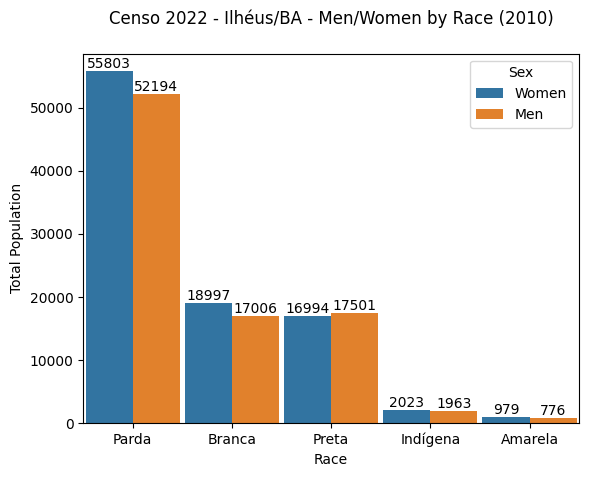

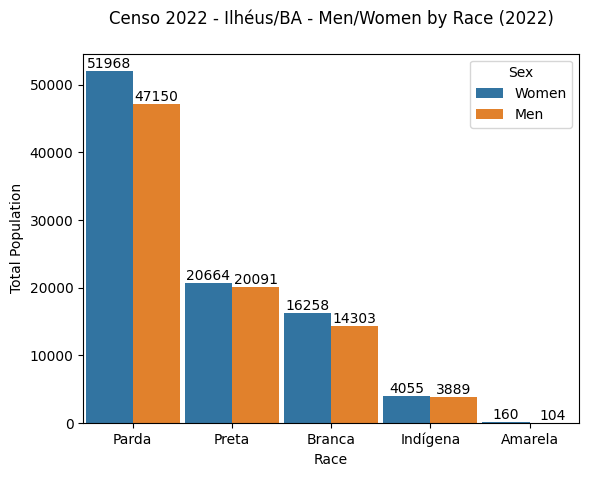

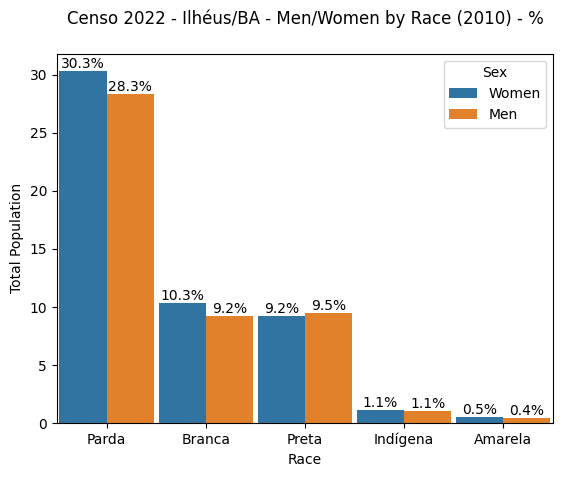

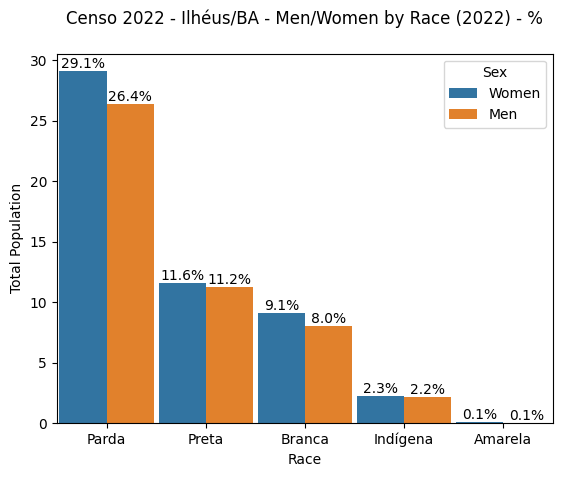

In [43]:
# Filter all races from 2010
all_races_2010 = df_pop_res_cor_raca_copy[(df_pop_res_cor_raca_copy['ano'] == 2010)].groupby(['sexo', 'cor_raca'])[['populacao_residente']].sum().sort_values(by='sexo', ascending=False)

# Rename index for the plot
all_races_2010.rename(index={'Mulheres': 'Women', 'Homens': 'Men'}, inplace=True)


all_races_2010_plot = sns.barplot(data=all_races_2010,
            y='populacao_residente',
            x='cor_raca',
            hue='sexo',
            order=['Parda', 'Branca', 'Preta', 'Indígena', 'Amarela'],
            width=0.95)

# Plot parameters
all_races_2010_plot.bar_label(all_races_2010_plot.containers[0], fontsize=10);
all_races_2010_plot.bar_label(all_races_2010_plot.containers[1], fontsize=10);
all_races_2010_plot.legend(title='Sex')
all_races_2010_plot.set(xlabel='Race', ylabel='Total Population', title='Censo 2022 - Ilhéus/BA - Men/Women by Race (2010)\n')
plt.show()
print('\n')


# Filter all races from 2022
all_races_2022 = df_pop_res_cor_raca_copy[(df_pop_res_cor_raca_copy['ano'] == 2022)].groupby(['sexo', 'cor_raca'])[['populacao_residente']].sum().sort_values(by='sexo', ascending=False)

# Rename index for the plot
all_races_2022.rename(index={'Mulheres': 'Women', 'Homens': 'Men'}, inplace=True)


all_races_2022_plot = sns.barplot(data=all_races_2022,
            y='populacao_residente',
            x='cor_raca',
            hue='sexo',
            order=['Parda', 'Preta', 'Branca', 'Indígena', 'Amarela'],
            width=0.95
            )

# Plot parameters
all_races_2022_plot.bar_label(all_races_2022_plot.containers[0], fontsize=10);
all_races_2022_plot.bar_label(all_races_2022_plot.containers[1], fontsize=10);
all_races_2022_plot.legend(title='Sex')
all_races_2022_plot.set(xlabel='Race', ylabel='Total Population', title='Censo 2022 - Ilhéus/BA - Men/Women by Race (2022)\n')
plt.show()
print('\n')
print('\n')



# Filter all races from 2010 perc
all_races_2010_perc = df_pop_res_cor_raca_copy[(df_pop_res_cor_raca_copy['ano'] == 2010)].groupby(['sexo', 'cor_raca'])[['populacao_residente']].sum().sort_values(by='sexo', ascending=False)
all_races_2010_perc = ((all_races_2010_perc / all_races_2010_perc.sum()) * 100)


# Rename index for the plot
all_races_2010_perc.rename(index={'Mulheres': 'Women', 'Homens': 'Men'}, inplace=True)


all_races_2010_perc_plot = sns.barplot(data=all_races_2010_perc,
            y='populacao_residente',
            x='cor_raca',
            hue='sexo',
            order=['Parda', 'Branca', 'Preta', 'Indígena', 'Amarela'],
            width=0.95)

# Plot parameters
all_races_2010_perc_plot.bar_label(all_races_2010_perc_plot.containers[0], fontsize=10, fmt='%.1f%%');
all_races_2010_perc_plot.bar_label(all_races_2010_perc_plot.containers[1], fontsize=10, fmt='%.1f%%');
all_races_2010_perc_plot.legend(title='Sex')
all_races_2010_perc_plot.set(xlabel='Race', ylabel='Total Population', title='Censo 2022 - Ilhéus/BA - Men/Women by Race (2010) - %\n')
plt.savefig('all_races__2010_perc.png', dpi=300, bbox_inches='tight')
plt.show()
print('\n')



# Filter all races from 2022 perc
all_races_2022_perc = df_pop_res_cor_raca_copy[(df_pop_res_cor_raca_copy['ano'] == 2022)].groupby(['sexo', 'cor_raca'])[['populacao_residente']].sum().sort_values(by='sexo', ascending=False)
all_races_2022_perc = ((all_races_2022_perc / all_races_2022_perc.sum()) * 100)


# Rename index for the plot
all_races_2022_perc.rename(index={'Mulheres': 'Women', 'Homens': 'Men'}, inplace=True)


all_races_2022_perc_plot = sns.barplot(data=all_races_2022_perc,
            y='populacao_residente',
            x='cor_raca',
            hue='sexo',
            order=['Parda', 'Preta', 'Branca', 'Indígena', 'Amarela'],
            width=0.95)

# Plot parameters
all_races_2022_perc_plot.bar_label(all_races_2022_perc_plot.containers[0], fontsize=10, fmt='%.1f%%');
all_races_2022_perc_plot.bar_label(all_races_2022_perc_plot.containers[1], fontsize=10, fmt='%.1f%%');
all_races_2022_perc_plot.legend(title='Sex')
all_races_2022_perc_plot.set(xlabel='Race', ylabel='Total Population', title='Censo 2022 - Ilhéus/BA - Men/Women by Race (2022) - %\n')
plt.savefig('all_races__2022_perc.png', dpi=300, bbox_inches='tight')
plt.show()
print('\n')



In [44]:
#Open the saved plot images on environment and save in variables

all_races__2010_perc = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/all_races__2010_perc.png')
all_races__2022_perc = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/all_races__2022_perc.png')

#Pass the plots into Gemini to get more accurates insights
response = model.generate_content(('Get insights from these datasets about Ilhéus population, make sure to compare 2010 with 2022',
                                                                                               all_races__2010_perc, all_races__2022_perc,
                                                                                               ))
print(response.text)

## Insights from Ilhéus Population Data (2010 & 2022)

These datasets showcase the demographic shifts in Ilhéus, Brazil, between 2010 and 2022, highlighting changes in the racial composition of the population.

**Key Observations:**

* **Decrease in "Parda" Population:** While still the largest group, the percentage of people identifying as "Parda" (mixed race) has decreased from 30.3% in 2010 to 29.1% in 2022 for women and from 28.3% to 26.4% for men. 
* **Increase in "Preta" Population:** There's a notable increase in the "Preta" (Black) population. For women, it rose from 9.2% to 11.6%, and for men, it rose from 9.2% to 11.2%. This suggests a potential increase in self-identification as Black within the population.
* **Decrease in "Branca" Population:** The "Branca" (White) population has decreased from 10.3% to 9.1% for women and from 9.5% to 8% for men. This could be linked to the increase in the "Preta" population, reflecting a potential shift in self-identification or demographi

In [45]:
df_quil_pop_res_mun

id_municipio          territorios_quilombolas  pessoas_quilombolas  \
0       2913606       Em territórios quilombolas                  NaN   
1       2913606  Fora de territórios quilombolas               2163.0   

   populacao_residente  
0                  NaN  
1             178703.0

In [53]:
(df_quil_pop_res_mun['pessoas_quilombolas'][1] / df_quil_pop_res_mun['populacao_residente'][1]) * 100

1.2103881859845667

The numbers show that there are 2163 people (about 1.21% of Ilhéus population) identified as Quilombolas.

It's also visible that apparently there are no official areas defined as Quilombos (settlements first established by escaped slaves in Brazil).

However, according to Fundação Cultural Palmares (https://www.gov.br/palmares/pt-br) and its Quilombo map of Brazil (https://www.palmares.gov.br/sites/mapa/), there are two estalished areas identified as Quilombos in Ilhéus (Morro do Miriqui and Alto Terra Nova).

Maybe there is still a process ongoing and we need more investigation, but according to Censo 2022, there are Quilombolas in Ilhéus but not living inside Quilombo areas.

In [60]:
df_mor_cor_raca_tip_dom_mun.groupby('tipo_domicilio')['moradores'].sum()

tipo_domicilio
Apartamento                                                 24740.0
Casa                                                       150084.0
Casa de vila ou em condomínio                                2929.0
Estrutura residencial permanente degradada ou inacabada        50.0
Habitação em casa de cômodos ou cortiço                       398.0
Habitação indígena sem paredes ou maloca                        0.0
Name: moradores, dtype: float64

In [70]:
df_mor_cor_raca_tip_dom_mun[df_mor_cor_raca_tip_dom_mun['tipo_domicilio'] == 'Apartamento'].groupby(['grupo_idade'])['moradores'].sum()

grupo_idade
0 a 4 anos          1429.0
10 a 14 anos        1587.0
100 anos ou mais       2.0
15 a 19 anos        1657.0
20 a 24 anos        1750.0
25 a 29 anos        1901.0
30 a 34 anos        1983.0
35 a 39 anos        2387.0
40 a 44 anos        2489.0
45 a 49 anos        1736.0
5 a 9 anos          1651.0
50 a 54 anos        1589.0
55 a 59 anos        1308.0
60 a 64 anos        1132.0
65 a 69 anos         814.0
70 a 74 anos         545.0
75 a 79 anos         339.0
80 a 84 anos         247.0
85 a 89 anos         120.0
90 a 94 anos          55.0
95 a 99 anos          19.0
Name: moradores, dtype: float64

In [46]:



#Residents tables
#df_mor_cor_raca_tip_dom_mun
#df_mor_cor_raca_lig_abast_agua_mun
#df_mor_cor_raca_esgot_san_mun
#df_mor_cor_raca_dest_lix_mun

#Indigenous tables
#df_indig_pop_res_mun
#df_indig_pop_grup_idad_mun
#df_indig_indic_env_mun
#df_indig_dom_1_mor_ind_mun
#df_indig_dom_mor_mun

#Domiciles tables
#df_dom_tipo_mun
#df_dom_qtde_esgot_san_mun
#df_dom_mor_setor_censit[df_dom_mor_setor_censit['id_setor_censitario'] == '291360645000030P']
#df_dom_mor_mun
#df_dom_lig_abast_agua_mun
#df_dom_esgot_san_mun
#df_dom_dest_lix_mun
#df_dom_canal_abast_agua_mun